#unzip dataset :
https://www.kaggle.com/datasets/briscdataset/brisc2025?resource=download

In [3]:
!unzip "/content/drive/MyDrive/Brain Tumor Segmentation and Classification/training_SupervisedLearning/dataset.zip" -d "/content/drive/MyDrive/Brain Tumor Segmentation and Classification/training_SupervisedLearning/"

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: /content/drive/MyDrive/Brain Tumor Segmentation and Classification/training_SupervisedLearning/brisc2025/segmentation_task/train/images/brisc2025_train_03934_pi_ax_t1.jpg  
  inflating: /content/drive/MyDrive/Brain Tumor Segmentation and Classification/training_SupervisedLearning/brisc2025/segmentation_task/train/images/brisc2025_train_03935_pi_ax_t1.jpg  
  inflating: /content/drive/MyDrive/Brain Tumor Segmentation and Classification/training_SupervisedLearning/brisc2025/segmentation_task/train/images/brisc2025_train_03936_pi_ax_t1.jpg  
  inflating: /content/drive/MyDrive/Brain Tumor Segmentation and Classification/training_SupervisedLearning/brisc2025/segmentation_task/train/images/brisc2025_train_03937_pi_ax_t1.jpg  
  inflating: /content/drive/MyDrive/Brain Tumor Segmentation and Classification/training_SupervisedLearning/brisc2025/segmentation_task/train/images/brisc2025_train_03938_pi_ax_t

#visualize data

https://www.kaggle.com/code/briscdataset/getting-started-with-brisc-2025#%F0%9F%93%82-2.-Directory-Structure

In [7]:
# Check dataset statistics
def check_dataset_stats():
    base_path = "/content/drive/MyDrive/Brain Tumor Segmentation and Classification/training_SupervisedLearning/brisc2025"

    # Segmentation stats
    seg_train_images = len(os.listdir(os.path.join(base_path, "segmentation_task/train/images")))
    seg_train_masks = len(os.listdir(os.path.join(base_path, "segmentation_task/train/masks")))

    print("=== DATASET STATISTICS ===")
    print(f"Segmentation - Training images: {seg_train_images}, Masks: {seg_train_masks}")

    # Classification stats
    class_train_path = os.path.join(base_path, "classification_task/train")
    classes = ['pituitary', 'meningioma', 'glioma', 'no_tumor']

    print("\nClassification - Training samples per class:")
    for class_name in classes:
        count = len(os.listdir(os.path.join(class_train_path, class_name)))
        print(f"  {class_name}: {count}")

check_dataset_stats()

=== DATASET STATISTICS ===
Segmentation - Training images: 3933, Masks: 3933

Classification - Training samples per class:
  pituitary: 1457
  meningioma: 1329
  glioma: 1147
  no_tumor: 1067


=== ROBUST SEGMENTATION VISUALIZATION ===
Trying to display 6 images and 6 masks


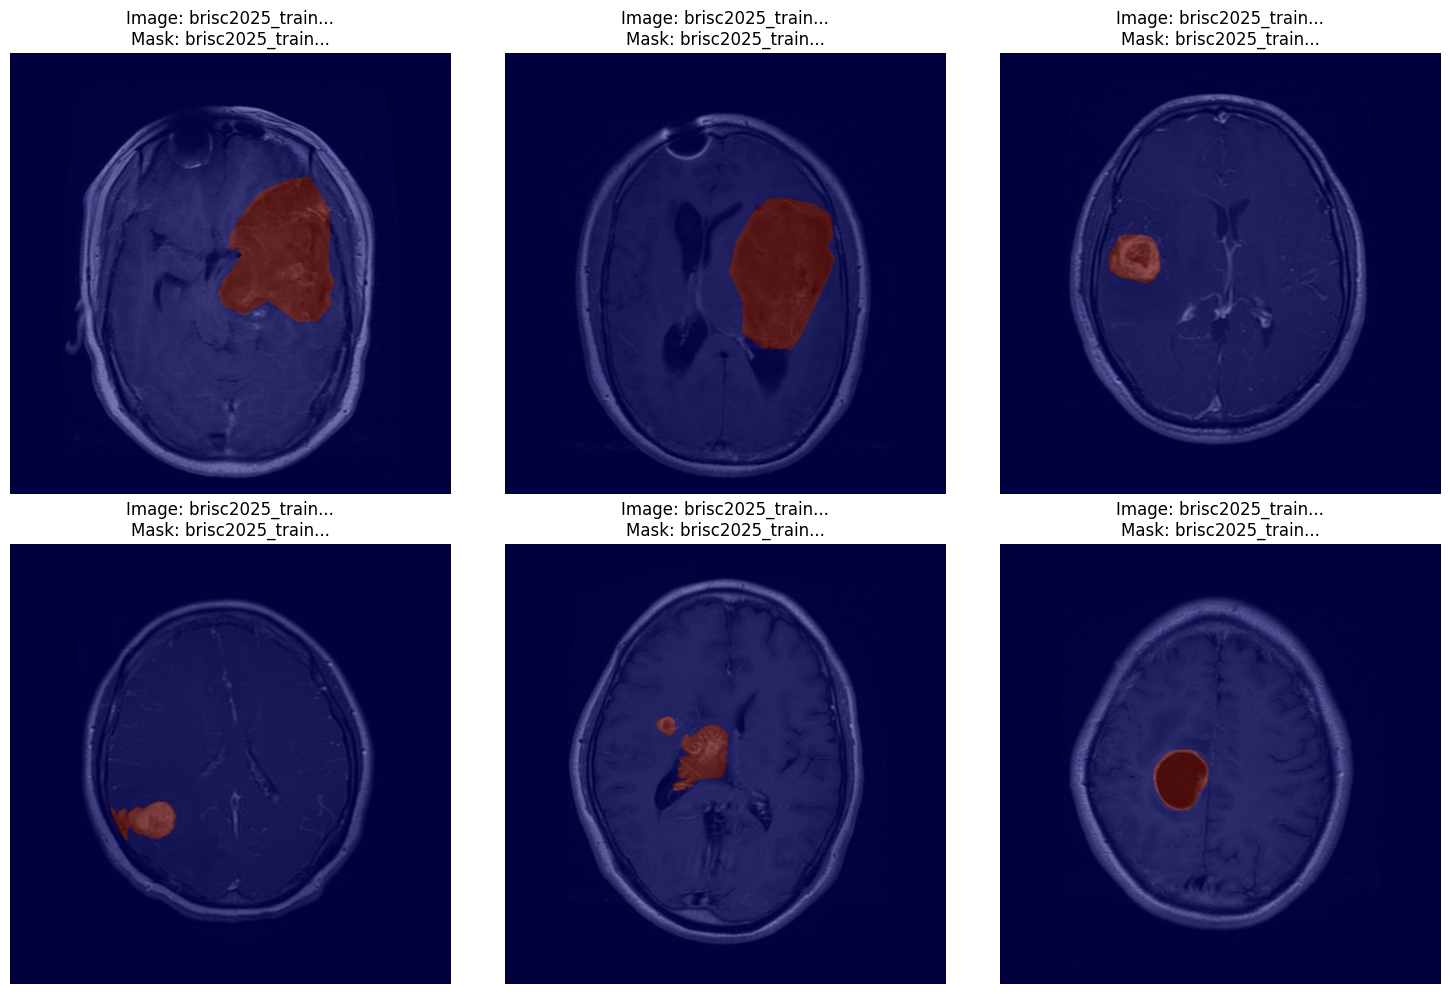

Successfully displayed 6 image-mask pairs

=== SEPARATE IMAGES AND MASKS ===
=== IMAGES ===


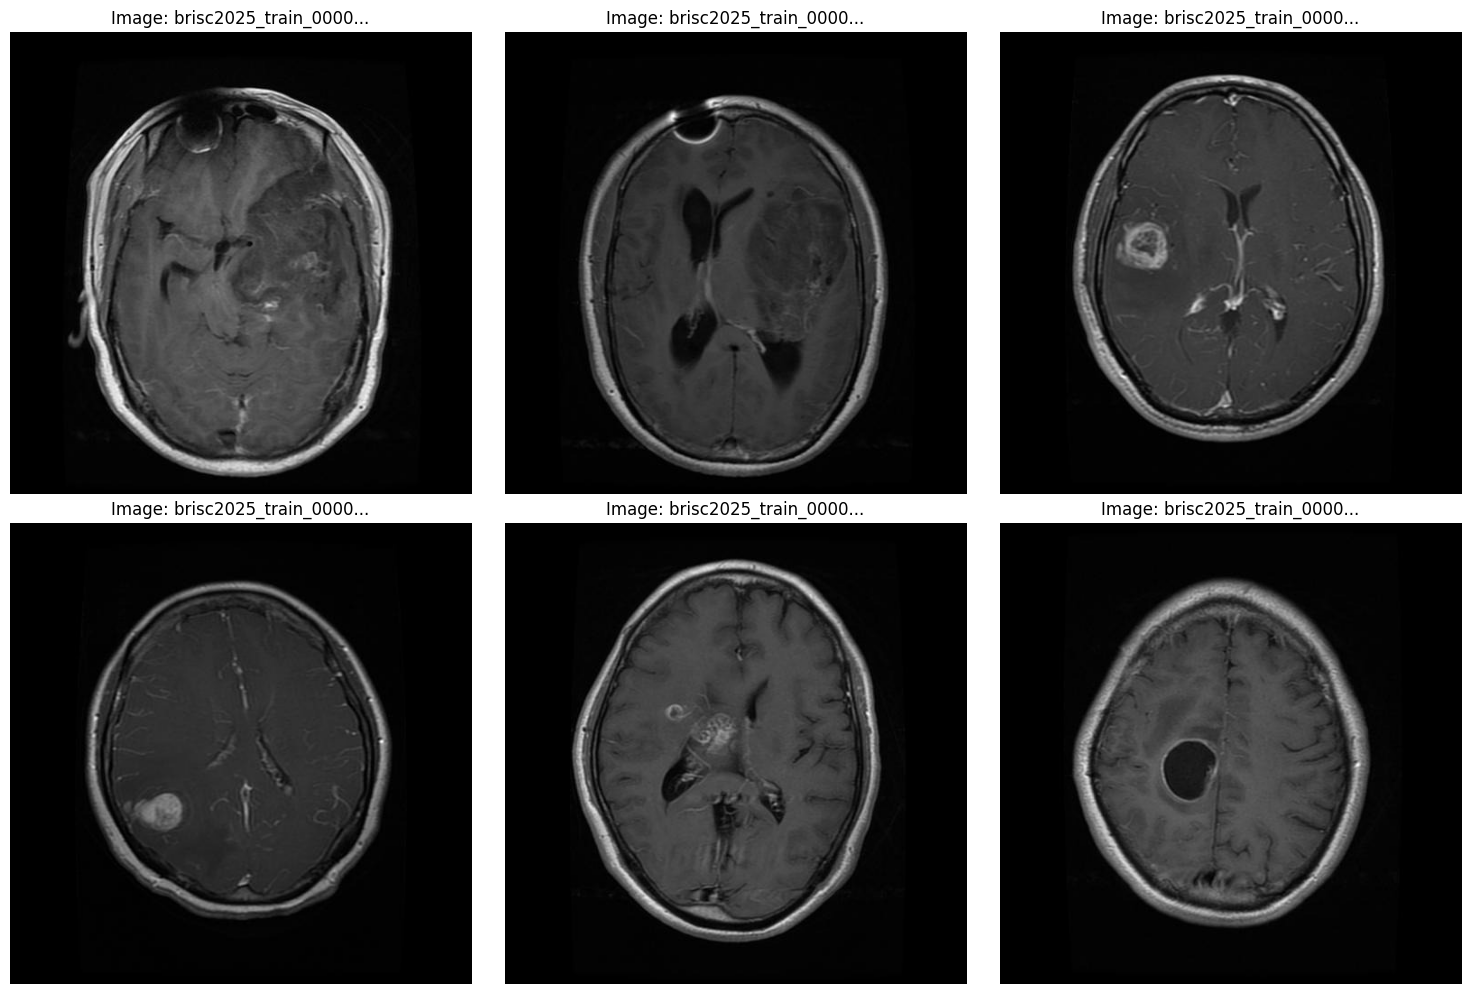

=== MASKS ===


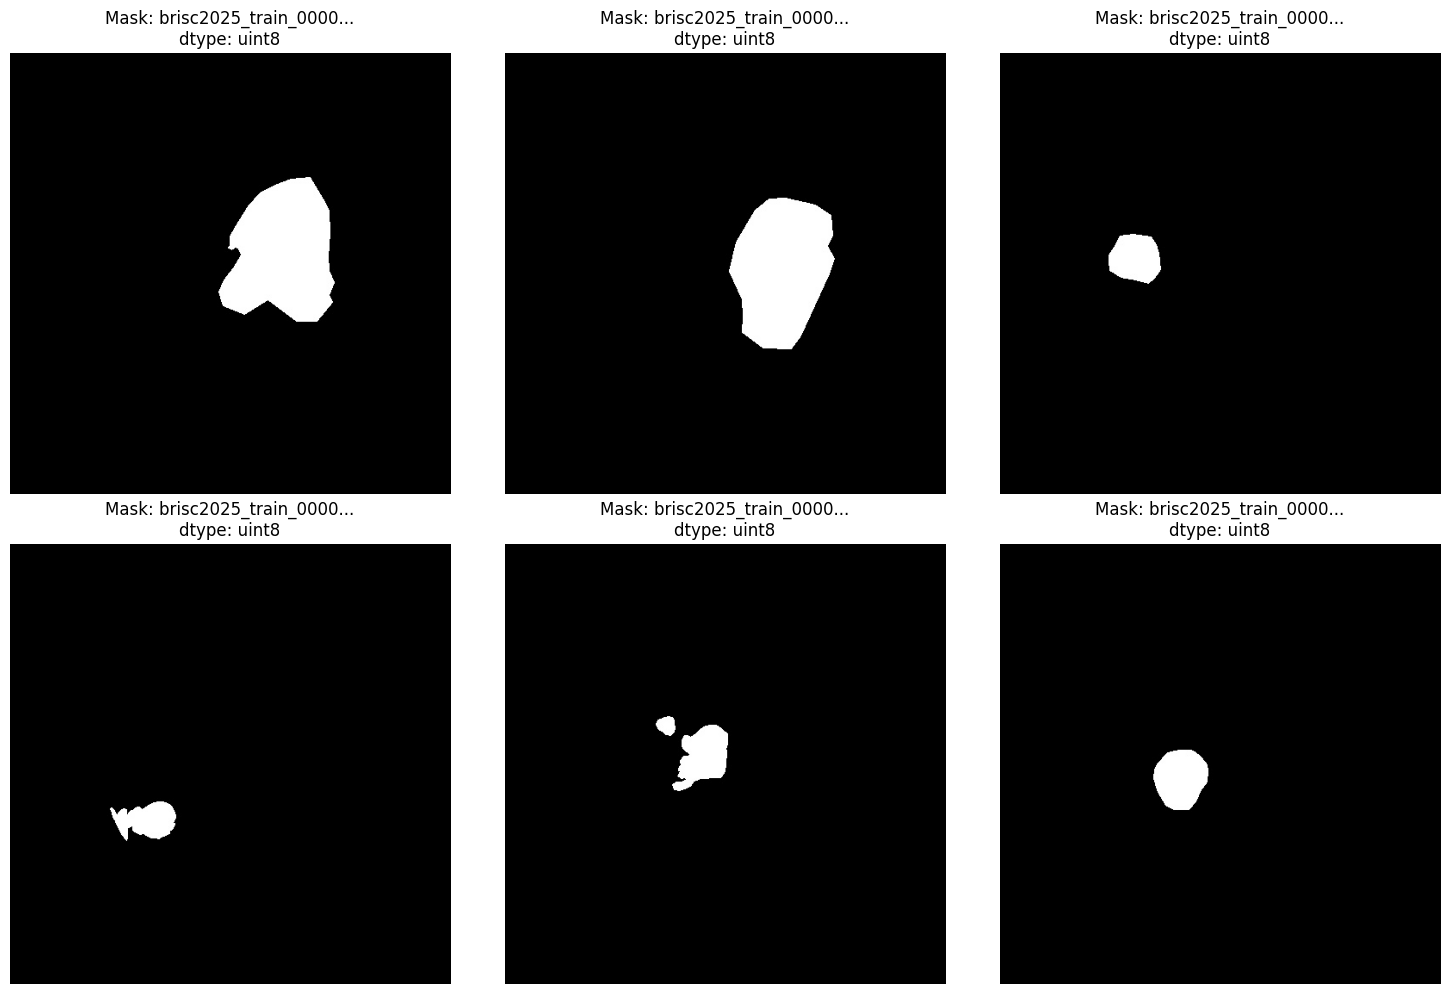

In [16]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
base_path = "/content/drive/MyDrive/Brain Tumor Segmentation and Classification/training_SupervisedLearning/brisc2025"
def robust_show_segmentation():
    base_path = "/content/drive/MyDrive/Brain Tumor Segmentation and Classification/training_SupervisedLearning/brisc2025"
    """Robust segmentation visualization that handles various file formats"""
    seg_train_images = os.path.join(base_path, "segmentation_task/train/images")
    seg_train_masks = os.path.join(base_path, "segmentation_task/train/masks")

    # Get files
    image_files = sorted(os.listdir(seg_train_images))[:6]  # First 6 images
    mask_files = sorted(os.listdir(seg_train_masks))[:6]   # First 6 masks

    print(f"Trying to display {len(image_files)} images and {len(mask_files)} masks")

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()

    successful_displays = 0

    for i in range(min(6, len(image_files), len(mask_files))):
        try:
            # Load image
            img_path = os.path.join(seg_train_images, image_files[i])
            img = cv2.imread(img_path)

            if img is None:
                print(f"Failed to load image: {image_files[i]}")
                continue

            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Load mask with multiple fallback methods
            mask_path = os.path.join(seg_train_masks, mask_files[i])
            mask = None

            # Method 1: Try OpenCV
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

            # Method 2: Try PIL if OpenCV fails
            if mask is None:
                try:
                    pil_mask = Image.open(mask_path)
                    mask = np.array(pil_mask)
                    if len(mask.shape) == 3:  # Convert RGB to grayscale
                        mask = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)
                except Exception as e:
                    print(f"PIL failed for {mask_files[i]}: {e}")

            # Method 3: Try numpy load if it's .npy file
            if mask is None and mask_path.endswith('.npy'):
                try:
                    mask = np.load(mask_path)
                except:
                    pass

            if mask is None:
                print(f"All methods failed for mask: {mask_files[i]}")
                continue

            # Ensure mask is 2D and uint8
            if mask.dtype != np.uint8:
                mask = mask.astype(np.uint8)

            # Display
            axes[successful_displays].imshow(img_rgb)
            axes[successful_displays].imshow(mask, cmap='jet', alpha=0.5)
            axes[successful_displays].set_title(f"Image: {image_files[i][:15]}...\nMask: {mask_files[i][:15]}...")
            axes[successful_displays].axis('off')

            successful_displays += 1

        except Exception as e:
            print(f"Error processing pair {i}: {e}")
            continue

    # Hide unused subplots
    for j in range(successful_displays, 6):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
    print(f"Successfully displayed {successful_displays} image-mask pairs")

def show_images_and_masks_separately():
    """Show images and masks in separate plots to avoid loading issues"""
    base_path = "/content/drive/MyDrive/Brain Tumor Segmentation and Classification/training_SupervisedLearning/brisc2025"
    seg_train_images = os.path.join(base_path, "segmentation_task/train/images")
    seg_train_masks = os.path.join(base_path, "segmentation_task/train/masks")

    # Show images
    image_files = sorted(os.listdir(seg_train_images))[:6]

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()

    print("=== IMAGES ===")
    for i, img_file in enumerate(image_files):
        img_path = os.path.join(seg_train_images, img_file)
        img = cv2.imread(img_path)

        if img is not None:
            axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            axes[i].set_title(f"Image: {img_file[:20]}...")
            axes[i].axis('off')
        else:
            axes[i].text(0.5, 0.5, f"Failed to load\n{img_file}",
                        ha='center', va='center', transform=axes[i].transAxes)
            axes[i].axis('off')

    plt.tight_layout()
    plt.show()

    # Show masks
    mask_files = sorted(os.listdir(seg_train_masks))[:6]

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()

    print("=== MASKS ===")
    for i, mask_file in enumerate(mask_files):
        mask_path = os.path.join(seg_train_masks, mask_file)

        # Try multiple loading methods
        mask = None
        try:
            # Try OpenCV first
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

            # Try PIL if OpenCV fails
            if mask is None:
                pil_mask = Image.open(mask_path)
                mask = np.array(pil_mask)

            # If still None, try numpy
            if mask is None and mask_path.endswith('.npy'):
                mask = np.load(mask_path)

        except Exception as e:
            print(f"Error loading {mask_file}: {e}")
            continue

        if mask is not None:
            # Convert to proper format for display
            if mask.dtype != np.uint8:
                mask = mask.astype(np.uint8)

            axes[i].imshow(mask, cmap='gray')
            axes[i].set_title(f"Mask: {mask_file[:20]}...\ndtype: {mask.dtype}")
            axes[i].axis('off')
        else:
            axes[i].text(0.5, 0.5, f"Failed to load\n{mask_file}",
                        ha='center', va='center', transform=axes[i].transAxes)
            axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Run the robust visualization
print("=== ROBUST SEGMENTATION VISUALIZATION ===")
robust_show_segmentation()

print("\n=== SEPARATE IMAGES AND MASKS ===")
show_images_and_masks_separately()

#train_multi_task_unet

In [18]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import cv2
from glob import glob
import json
from datetime import datetime

# ============================================================================
# CONFIGURATION - OPTIMIZED FOR FASTER TRAINING
# ============================================================================
class Config:
    # Paths
    BASE_PATH = "/content/drive/MyDrive/Brain Tumor Segmentation and Classification/training_SupervisedLearning/brisc2025"
    SEG_IMAGES = os.path.join(BASE_PATH, "segmentation_task/train/images")
    SEG_MASKS = os.path.join(BASE_PATH, "segmentation_task/train/masks")
    CLASSIF_PATH = os.path.join(BASE_PATH, "classification_task")

    # Model params - OPTIMIZED
    IMG_SIZE = (128, 128)  # Reduced from 256x256 (4x fewer pixels)
    BATCH_SIZE = 16  # Increased from 8 (better GPU utilization)
    EPOCHS = 50
    LEARNING_RATE = 5e-4  # Increased for faster convergence
    VALIDATION_SPLIT = 0.15

    # Class mapping
    CLASS_MAPPING = {
        'gl': 0,  # glioma
        'me': 1,  # meningioma
        'pi': 2,  # pituitary
        'nt': 3   # no tumor
    }
    NUM_CLASSES = 4

    # Loss weights
    SEG_LOSS_WEIGHT = 1.0
    CLASS_LOSS_WEIGHT = 1.0

    # Checkpoint dir
    CHECKPOINT_DIR = os.path.join(BASE_PATH, "checkpoints")
    os.makedirs(CHECKPOINT_DIR, exist_ok=True)

config = Config()

# ============================================================================
# DATA LOADING & PREPROCESSING
# ============================================================================
def parse_filename(filename):
    """Extract metadata from BRISC2025 filename format"""
    # brisc2025_train_00001_gl_ax_t1.jpg
    basename = os.path.basename(filename)
    parts = basename.replace('.jpg', '').replace('.png', '').split('_')

    return {
        'split': parts[1],
        'index': parts[2],
        'tumor': parts[3],
        'view': parts[4],
        'sequence': parts[5]
    }

def load_dataset():
    """Load and prepare dataset with train/val split"""
    print("Loading dataset...")

    # Get all segmentation images
    image_paths = sorted(glob(os.path.join(config.SEG_IMAGES, "*.jpg")))
    mask_paths = sorted(glob(os.path.join(config.SEG_MASKS, "*.png")))

    print(f"Found {len(image_paths)} images and {len(mask_paths)} masks")

    # Extract labels from filenames
    labels = []
    for img_path in image_paths:
        metadata = parse_filename(img_path)
        tumor_code = metadata['tumor']
        labels.append(config.CLASS_MAPPING[tumor_code])

    # Verify image-mask correspondence
    for img_path, mask_path in zip(image_paths, mask_paths):
        img_base = os.path.splitext(os.path.basename(img_path))[0]
        mask_base = os.path.splitext(os.path.basename(mask_path))[0]
        assert img_base == mask_base, f"Mismatch: {img_base} != {mask_base}"

    # Stratified train/validation split
    train_imgs, val_imgs, train_masks, val_masks, train_labels, val_labels = train_test_split(
        image_paths, mask_paths, labels,
        test_size=config.VALIDATION_SPLIT,
        stratify=labels,
        random_state=42
    )

    print(f"\nDataset split:")
    print(f"Training: {len(train_imgs)} samples")
    print(f"Validation: {len(val_imgs)} samples")

    # Count class distribution
    train_dist = np.bincount(train_labels, minlength=config.NUM_CLASSES)
    val_dist = np.bincount(val_labels, minlength=config.NUM_CLASSES)
    class_names = ['Glioma', 'Meningioma', 'Pituitary', 'No Tumor']

    print("\nClass distribution (Train):")
    for i, name in enumerate(class_names):
        print(f"  {name}: {train_dist[i]}")

    print("\nClass distribution (Validation):")
    for i, name in enumerate(class_names):
        print(f"  {val_dist[i]}")

    return (train_imgs, train_masks, train_labels), (val_imgs, val_masks, val_labels)

# ============================================================================
# DATA GENERATORS
# ============================================================================
def load_and_preprocess(img_path, mask_path, label):
    """Load and preprocess image, mask, and label"""
    # Load image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, config.IMG_SIZE)
    img = img.astype(np.float32) / 255.0

    # Load mask
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, config.IMG_SIZE, interpolation=cv2.INTER_NEAREST)
    mask = (mask > 127).astype(np.float32)  # Binary mask
    mask = mask[..., np.newaxis]  # Add channel dimension

    # One-hot encode label
    label_onehot = tf.keras.utils.to_categorical(label, config.NUM_CLASSES)

    return img, mask, label_onehot

def augment(img, mask):
    """Apply lightweight data augmentation"""
    # Random horizontal flip
    if np.random.rand() > 0.5:
        img = np.fliplr(img)
        mask = np.fliplr(mask)

    # Random brightness (simplified)
    if np.random.rand() > 0.5:
        factor = np.random.uniform(0.85, 1.15)
        img = np.clip(img * factor, 0, 1)

    return img, mask

def data_generator(img_paths, mask_paths, labels, batch_size, augment_data=False):
    """Generate batches of data"""
    num_samples = len(img_paths)
    indices = np.arange(num_samples)

    while True:
        np.random.shuffle(indices)

        for start_idx in range(0, num_samples, batch_size):
            batch_indices = indices[start_idx:start_idx + batch_size]

            batch_imgs = []
            batch_masks = []
            batch_labels = []

            for idx in batch_indices:
                img, mask, label = load_and_preprocess(
                    img_paths[idx], mask_paths[idx], labels[idx]
                )

                if augment_data:
                    img, mask = augment(img, mask)

                batch_imgs.append(img)
                batch_masks.append(mask)
                batch_labels.append(label)

            batch_imgs = np.array(batch_imgs)
            batch_masks = np.array(batch_masks)
            batch_labels = np.array(batch_labels)

            yield batch_imgs, {'segmentation': batch_masks, 'classification': batch_labels}

# ============================================================================
# LIGHTWEIGHT MULTI-TASK U-NET MODEL
# ============================================================================
def conv_block(x, filters, kernel_size=3):
    """Lightweight convolutional block"""
    x = layers.Conv2D(filters, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    return x

def encoder_block(x, filters):
    """Lightweight encoder block"""
    skip = conv_block(x, filters)
    x = layers.MaxPooling2D(2)(skip)
    return x, skip

def decoder_block(x, skip, filters):
    """Lightweight decoder block"""
    x = layers.Conv2DTranspose(filters, 2, strides=2, padding='same')(x)
    x = layers.Concatenate()([x, skip])
    x = conv_block(x, filters)
    return x

def build_multitask_unet(input_shape=(128, 128, 3), num_classes=4):
    """Build lightweight multi-task U-Net"""
    inputs = layers.Input(shape=input_shape)

    # Encoder - REDUCED FILTERS (32, 64, 128, 256 instead of 64, 128, 256, 512)
    x, skip1 = encoder_block(inputs, 32)
    x, skip2 = encoder_block(x, 64)
    x, skip3 = encoder_block(x, 128)

    # Bottleneck - REDUCED (256 instead of 1024)
    x = conv_block(x, 256)

    # ===== SEGMENTATION BRANCH =====
    # Decoder - REDUCED FILTERS
    seg = decoder_block(x, skip3, 128)
    seg = decoder_block(seg, skip2, 64)
    seg = decoder_block(seg, skip1, 32)

    # Segmentation output
    seg_output = layers.Conv2D(1, 1, activation='sigmoid', name='segmentation')(seg)

    # ===== CLASSIFICATION BRANCH =====
    # Lightweight classification head
    clf = layers.GlobalAveragePooling2D()(x)
    clf = layers.Dense(128, activation='relu')(clf)  # Reduced from 512
    clf = layers.Dropout(0.3)(clf)  # Reduced dropout
    clf = layers.Dense(64, activation='relu')(clf)  # Reduced from 256
    clf = layers.Dropout(0.3)(clf)

    # Classification output
    clf_output = layers.Dense(num_classes, activation='softmax', name='classification')(clf)

    # Build model
    model = models.Model(inputs=inputs, outputs=[seg_output, clf_output])

    return model

# ============================================================================
# CUSTOM METRICS & CALLBACKS
# ============================================================================
def dice_coefficient(y_true, y_pred, smooth=1e-6):
    """Dice coefficient for segmentation"""
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + smooth)

def dice_loss(y_true, y_pred):
    """Dice loss for segmentation"""
    return 1 - dice_coefficient(y_true, y_pred)

class TrainingMonitor(keras.callbacks.Callback):
    """Custom callback for monitoring training"""
    def on_epoch_end(self, epoch, logs=None):
        print(f"\nEpoch {epoch + 1} Summary:")
        print(f"  Seg Loss: {logs['segmentation_loss']:.4f} | Val Seg Loss: {logs['val_segmentation_loss']:.4f}")
        print(f"  Dice: {logs['segmentation_dice_coefficient']:.4f} | Val Dice: {logs['val_segmentation_dice_coefficient']:.4f}")
        print(f"  Clf Loss: {logs['classification_loss']:.4f} | Val Clf Loss: {logs['val_classification_loss']:.4f}")
        print(f"  Clf Acc: {logs['classification_accuracy']:.4f} | Val Clf Acc: {logs['val_classification_accuracy']:.4f}")

# ============================================================================
# TRAINING
# ============================================================================
def train_model():
    """Main training function"""
    print("="*80)
    print("BRISC2025 Lightweight Multi-Task U-Net Training")
    print("="*80)

    # Load dataset
    (train_imgs, train_masks, train_labels), (val_imgs, val_masks, val_labels) = load_dataset()

    # Create data generators
    train_gen = data_generator(train_imgs, train_masks, train_labels,
                               config.BATCH_SIZE, augment_data=True)
    val_gen = data_generator(val_imgs, val_masks, val_labels,
                            config.BATCH_SIZE, augment_data=False)

    steps_per_epoch = len(train_imgs) // config.BATCH_SIZE
    validation_steps = len(val_imgs) // config.BATCH_SIZE

    # Build model
    print("\nBuilding Lightweight Multi-Task U-Net model...")
    model = build_multitask_unet(
        input_shape=(*config.IMG_SIZE, 3),
        num_classes=config.NUM_CLASSES
    )

    # Compile model with multiple losses
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=config.LEARNING_RATE),
        loss={
            'segmentation': dice_loss,
            'classification': 'categorical_crossentropy'
        },
        loss_weights={
            'segmentation': config.SEG_LOSS_WEIGHT,
            'classification': config.CLASS_LOSS_WEIGHT
        },
        metrics={
            'segmentation': [dice_coefficient, 'binary_accuracy'],
            'classification': ['accuracy', 'categorical_accuracy']
        }
    )

    model.summary()

    # Callbacks - OPTIMIZED
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    checkpoint_path = os.path.join(config.CHECKPOINT_DIR, f"multitask_unet_{timestamp}.h5")

    callbacks = [
        keras.callbacks.ModelCheckpoint(
            checkpoint_path,
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=7,  # Increased patience
            min_lr=1e-7,
            verbose=1
        ),
        keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=15,  # Increased patience for 50 epochs
            restore_best_weights=True,
            verbose=1
        ),
        TrainingMonitor()
    ]

    # Train model
    print(f"\nStarting training for {config.EPOCHS} epochs...")
    print(f"Steps per epoch: {steps_per_epoch}")
    print(f"Validation steps: {validation_steps}")
    print(f"\nOptimizations applied:")
    print(f"  • Image size: 128x128 (4x faster than 256x256)")
    print(f"  • Batch size: 16 (2x larger)")
    print(f"  • Model filters reduced by ~50%")
    print(f"  • Encoder depth: 3 layers (instead of 4)")
    print(f"  • Classification head: simplified")

    history = model.fit(
        train_gen,
        steps_per_epoch=steps_per_epoch,
        epochs=config.EPOCHS,
        validation_data=val_gen,
        validation_steps=validation_steps,
        callbacks=callbacks,
        verbose=1
    )

    # Save final model
    final_model_path = os.path.join(config.CHECKPOINT_DIR, f"multitask_unet_final_{timestamp}.h5")
    model.save(final_model_path)
    print(f"\nFinal model saved to: {final_model_path}")

    # Save training history
    history_path = os.path.join(config.CHECKPOINT_DIR, f"history_{timestamp}.json")
    with open(history_path, 'w') as f:
        json.dump({k: [float(v) for v in vals] for k, vals in history.history.items()}, f)
    print(f"Training history saved to: {history_path}")

    print("\n" + "="*80)
    print("Training completed successfully!")
    print("="*80)

    return model, history

# ============================================================================
# MAIN EXECUTION
# ============================================================================
if __name__ == "__main__":
    # Train the model
    model, history = train_model()

    print("\n✓ Training complete!")
    print(f"✓ Best model saved in: {config.CHECKPOINT_DIR}")
    print("\nNext steps:")
    print("  1. Run validation analysis on the saved model")
    print("  2. Evaluate on test set")
    print("  3. Visualize predictions")

BRISC2025 Lightweight Multi-Task U-Net Training
Loading dataset...
Found 3933 images and 3933 masks

Dataset split:
Training: 3343 samples
Validation: 590 samples

Class distribution (Train):
  Glioma: 975
  Meningioma: 1130
  Pituitary: 1238
  No Tumor: 0

Class distribution (Validation):
  172
  199
  219
  0

Building Lightweight Multi-Task U-Net model...


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 128, 128,  │        896 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        128 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_7        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 64, 64,    │          0 │ activation_7[0][… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 64, 64,    │     18,496 │ max_pooling2d_3[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        256 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_8        │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 32, 32,    │          0 │ activation_8[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 32, 32,    │     73,856 │ max_pooling2d_4[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        512 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_9        │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 16, 16,    │          0 │ activation_9[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 16, 16,    │    295,168 │ max_pooling2d_5[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │      1,024 │ conv2d_10[0][0]   │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_10       │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (Activation)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_3  │ (None, 32, 32,    │    131,200 │ activation_10[0]

 Total params: 992,229 (3.79 MB)

 Trainable params: 990,821 (3.78 MB)

 Non-trainable params: 1,408 (5.50 KB)


Starting training for 50 epochs...
Steps per epoch: 208
Validation steps: 36

Optimizations applied:
  • Image size: 128x128 (4x faster than 256x256)
  • Batch size: 16 (2x larger)
  • Model filters reduced by ~50%
  • Encoder depth: 3 layers (instead of 4)
  • Classification head: simplified
Epoch 1/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - classification_accuracy: 0.6244 - classification_categorical_accuracy: 0.6244 - classification_loss: 0.8760 - loss: 1.8062 - segmentation_binary_accuracy: 0.6704 - segmentation_dice_coefficient: 0.0698 - segmentation_loss: 0.9302
Epoch 1: val_loss improved from inf to 4.46281, saving model to /content/drive/MyDrive/Brain Tumor Segmentation and Classification/training_SupervisedLearning/brisc2025/checkpoints/multitask_unet_20251128_150846.h5



Epoch 1 Summary:
  Seg Loss: 0.9050 | Val Seg Loss: 0.9787
  Dice: 0.0950 | Val Dice: 0.0213
  Clf Loss: 0.7519 | Val Clf Loss: 3.4841
  Clf Acc: 0.6917 | Val Clf Acc: 0.2899
208/208 ━━━━━━━━━━━━━━━━━━━━ 95s 392ms/step - classification_accuracy: 0.6247 - classification_categorical_accuracy: 0.6247 - classification_loss: 0.8754 - loss: 1.8055 - segmentation_binary_accuracy: 0.6711 - segmentation_dice_coefficient: 0.0699 - segmentation_loss: 0.9301 - val_classification_accuracy: 0.2899 - val_classification_categorical_accuracy: 0.2899 - val_classification_loss: 3.4841 - val_loss: 4.4628 - val_segmentation_binary_accuracy: 0.9503 - val_segmentation_dice_coefficient: 0.0213 - val_segmentation_loss: 0.9787 - learning_rate: 5.0000e-04
Epoch 2/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - classification_accuracy: 0.7892 - classification_categorical_accuracy: 0.7892 - classification_loss: 0.5411 - loss: 1.3013 - segmentation_binary_accuracy: 0.9622 - segmentation_dice_coefficient: 0.2398 - 


Epoch 2 Summary:
  Seg Loss: 0.6506 | Val Seg Loss: 0.9676
  Dice: 0.3494 | Val Dice: 0.0324
  Clf Loss: 0.4933 | Val Clf Loss: 0.9931
  Clf Acc: 0.8094 | Val Clf Acc: 0.6476
208/208 ━━━━━━━━━━━━━━━━━━━━ 60s 260ms/step - classification_accuracy: 0.7893 - classification_categorical_accuracy: 0.7893 - classification_loss: 0.5409 - loss: 1.3005 - segmentation_binary_accuracy: 0.9622 - segmentation_dice_coefficient: 0.2403 - segmentation_loss: 0.7597 - val_classification_accuracy: 0.6476 - val_classification_categorical_accuracy: 0.6476 - val_classification_loss: 0.9931 - val_loss: 1.9607 - val_segmentation_binary_accuracy: 0.9240 - val_segmentation_dice_coefficient: 0.0324 - val_segmentation_loss: 0.9676 - learning_rate: 5.0000e-04
Epoch 3/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - classification_accuracy: 0.8291 - classification_categorical_accuracy: 0.8291 - classification_loss: 0.4578 - loss: 0.8822 - segmentation_binary_accuracy: 0.9889 - segmentation_dice_coefficient: 0.5757 - 


Epoch 3 Summary:
  Seg Loss: 0.3962 | Val Seg Loss: 0.4225
  Dice: 0.6038 | Val Dice: 0.5775
  Clf Loss: 0.4455 | Val Clf Loss: 0.8466
  Clf Acc: 0.8314 | Val Clf Acc: 0.6128
208/208 ━━━━━━━━━━━━━━━━━━━━ 54s 262ms/step - classification_accuracy: 0.8292 - classification_categorical_accuracy: 0.8292 - classification_loss: 0.4578 - loss: 0.8820 - segmentation_binary_accuracy: 0.9889 - segmentation_dice_coefficient: 0.5758 - segmentation_loss: 0.4242 - val_classification_accuracy: 0.6128 - val_classification_categorical_accuracy: 0.6128 - val_classification_loss: 0.8466 - val_loss: 1.2691 - val_segmentation_binary_accuracy: 0.9891 - val_segmentation_dice_coefficient: 0.5775 - val_segmentation_loss: 0.4225 - learning_rate: 5.0000e-04
Epoch 4/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - classification_accuracy: 0.8588 - classification_categorical_accuracy: 0.8588 - classification_loss: 0.3908 - loss: 0.7299 - segmentation_binary_accuracy: 0.9906 - segmentation_dice_coefficient: 0.6610 - 


Epoch 6 Summary:
  Seg Loss: 0.2907 | Val Seg Loss: 0.4294
  Dice: 0.7093 | Val Dice: 0.5706
  Clf Loss: 0.3367 | Val Clf Loss: 0.5287
  Clf Acc: 0.8741 | Val Clf Acc: 0.7753
208/208 ━━━━━━━━━━━━━━━━━━━━ 53s 257ms/step - classification_accuracy: 0.8730 - classification_categorical_accuracy: 0.8730 - classification_loss: 0.3377 - loss: 0.6396 - segmentation_binary_accuracy: 0.9912 - segmentation_dice_coefficient: 0.6978 - segmentation_loss: 0.3022 - val_classification_accuracy: 0.7753 - val_classification_categorical_accuracy: 0.7753 - val_classification_loss: 0.5287 - val_loss: 0.9571 - val_segmentation_binary_accuracy: 0.9897 - val_segmentation_dice_coefficient: 0.5706 - val_segmentation_loss: 0.4294 - learning_rate: 5.0000e-04
Epoch 7/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - classification_accuracy: 0.8797 - classification_categorical_accuracy: 0.8797 - classification_loss: 0.3128 - loss: 0.5764 - segmentation_binary_accuracy: 0.9925 - segmentation_dice_coefficient: 0.7360 - 


Epoch 8 Summary:
  Seg Loss: 0.2674 | Val Seg Loss: 0.2694
  Dice: 0.7326 | Val Dice: 0.7306
  Clf Loss: 0.2990 | Val Clf Loss: 0.5958
  Clf Acc: 0.8957 | Val Clf Acc: 0.7561
208/208 ━━━━━━━━━━━━━━━━━━━━ 53s 256ms/step - classification_accuracy: 0.8930 - classification_categorical_accuracy: 0.8930 - classification_loss: 0.2841 - loss: 0.5558 - segmentation_binary_accuracy: 0.9923 - segmentation_dice_coefficient: 0.7284 - segmentation_loss: 0.2716 - val_classification_accuracy: 0.7561 - val_classification_categorical_accuracy: 0.7561 - val_classification_loss: 0.5958 - val_loss: 0.8670 - val_segmentation_binary_accuracy: 0.9922 - val_segmentation_dice_coefficient: 0.7306 - val_segmentation_loss: 0.2694 - learning_rate: 5.0000e-04
Epoch 9/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - classification_accuracy: 0.9022 - classification_categorical_accuracy: 0.9022 - classification_loss: 0.2574 - loss: 0.4958 - segmentation_binary_accuracy: 0.9929 - segmentation_dice_coefficient: 0.7614 - 


Epoch 10 Summary:
  Seg Loss: 0.2346 | Val Seg Loss: 0.3384
  Dice: 0.7654 | Val Dice: 0.6616
  Clf Loss: 0.2555 | Val Clf Loss: 0.4676
  Clf Acc: 0.9035 | Val Clf Acc: 0.8380
208/208 ━━━━━━━━━━━━━━━━━━━━ 53s 255ms/step - classification_accuracy: 0.9061 - classification_categorical_accuracy: 0.9061 - classification_loss: 0.2531 - loss: 0.4947 - segmentation_binary_accuracy: 0.9929 - segmentation_dice_coefficient: 0.7584 - segmentation_loss: 0.2416 - val_classification_accuracy: 0.8380 - val_classification_categorical_accuracy: 0.8380 - val_classification_loss: 0.4676 - val_loss: 0.8048 - val_segmentation_binary_accuracy: 0.9912 - val_segmentation_dice_coefficient: 0.6616 - val_segmentation_loss: 0.3384 - learning_rate: 5.0000e-04
Epoch 11/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - classification_accuracy: 0.9025 - classification_categorical_accuracy: 0.9025 - classification_loss: 0.2614 - loss: 0.4914 - segmentation_binary_accuracy: 0.9933 - segmentation_dice_coefficient: 0.7703 


Epoch 19 Summary:
  Seg Loss: 0.1632 | Val Seg Loss: 0.2191
  Dice: 0.8368 | Val Dice: 0.7809
  Clf Loss: 0.1096 | Val Clf Loss: 0.3616
  Clf Acc: 0.9618 | Val Clf Acc: 0.9059
208/208 ━━━━━━━━━━━━━━━━━━━━ 54s 262ms/step - classification_accuracy: 0.9603 - classification_categorical_accuracy: 0.9603 - classification_loss: 0.1171 - loss: 0.2915 - segmentation_binary_accuracy: 0.9950 - segmentation_dice_coefficient: 0.8257 - segmentation_loss: 0.1743 - val_classification_accuracy: 0.9059 - val_classification_categorical_accuracy: 0.9059 - val_classification_loss: 0.3616 - val_loss: 0.5793 - val_segmentation_binary_accuracy: 0.9935 - val_segmentation_dice_coefficient: 0.7809 - val_segmentation_loss: 0.2191 - learning_rate: 2.5000e-04
Epoch 20/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - classification_accuracy: 0.9672 - classification_categorical_accuracy: 0.9672 - classification_loss: 0.1020 - loss: 0.2593 - segmentation_binary_accuracy: 0.9953 - segmentation_dice_coefficient: 0.8428 


Epoch 26 Summary:
  Seg Loss: 0.1336 | Val Seg Loss: 0.1810
  Dice: 0.8664 | Val Dice: 0.8190
  Clf Loss: 0.0800 | Val Clf Loss: 0.2004
  Clf Acc: 0.9720 | Val Clf Acc: 0.9355
208/208 ━━━━━━━━━━━━━━━━━━━━ 52s 250ms/step - classification_accuracy: 0.9690 - classification_categorical_accuracy: 0.9690 - classification_loss: 0.0908 - loss: 0.2257 - segmentation_binary_accuracy: 0.9958 - segmentation_dice_coefficient: 0.8651 - segmentation_loss: 0.1349 - val_classification_accuracy: 0.9355 - val_classification_categorical_accuracy: 0.9355 - val_classification_loss: 0.2004 - val_loss: 0.3816 - val_segmentation_binary_accuracy: 0.9946 - val_segmentation_dice_coefficient: 0.8190 - val_segmentation_loss: 0.1810 - learning_rate: 2.5000e-04
Epoch 27/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - classification_accuracy: 0.9760 - classification_categorical_accuracy: 0.9760 - classification_loss: 0.0740 - loss: 0.2232 - segmentation_binary_accuracy: 0.9955 - segmentation_dice_coefficient: 0.8509 


Epoch 34 Summary:
  Seg Loss: 0.1176 | Val Seg Loss: 0.1846
  Dice: 0.8824 | Val Dice: 0.8154
  Clf Loss: 0.0268 | Val Clf Loss: 0.1699
  Clf Acc: 0.9919 | Val Clf Acc: 0.9477
208/208 ━━━━━━━━━━━━━━━━━━━━ 52s 253ms/step - classification_accuracy: 0.9903 - classification_categorical_accuracy: 0.9903 - classification_loss: 0.0371 - loss: 0.1585 - segmentation_binary_accuracy: 0.9962 - segmentation_dice_coefficient: 0.8786 - segmentation_loss: 0.1214 - val_classification_accuracy: 0.9477 - val_classification_categorical_accuracy: 0.9477 - val_classification_loss: 0.1699 - val_loss: 0.3551 - val_segmentation_binary_accuracy: 0.9944 - val_segmentation_dice_coefficient: 0.8154 - val_segmentation_loss: 0.1846 - learning_rate: 1.2500e-04
Epoch 35/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - classification_accuracy: 0.9888 - classification_categorical_accuracy: 0.9888 - classification_loss: 0.0350 - loss: 0.1555 - segmentation_binary_accuracy: 0.9964 - segmentation_dice_coefficient: 0.8794 


Epoch 35 Summary:
  Seg Loss: 0.1165 | Val Seg Loss: 0.1852
  Dice: 0.8835 | Val Dice: 0.8148
  Clf Loss: 0.0330 | Val Clf Loss: 0.1630
  Clf Acc: 0.9898 | Val Clf Acc: 0.9460
208/208 ━━━━━━━━━━━━━━━━━━━━ 52s 250ms/step - classification_accuracy: 0.9888 - classification_categorical_accuracy: 0.9888 - classification_loss: 0.0350 - loss: 0.1555 - segmentation_binary_accuracy: 0.9964 - segmentation_dice_coefficient: 0.8795 - segmentation_loss: 0.1205 - val_classification_accuracy: 0.9460 - val_classification_categorical_accuracy: 0.9460 - val_classification_loss: 0.1630 - val_loss: 0.3486 - val_segmentation_binary_accuracy: 0.9942 - val_segmentation_dice_coefficient: 0.8148 - val_segmentation_loss: 0.1852 - learning_rate: 1.2500e-04
Epoch 36/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - classification_accuracy: 0.9883 - classification_categorical_accuracy: 0.9883 - classification_loss: 0.0349 - loss: 0.1544 - segmentation_binary_accuracy: 0.9963 - segmentation_dice_coefficient: 0.8805 


Epoch 48 Summary:
  Seg Loss: 0.1028 | Val Seg Loss: 0.1848
  Dice: 0.8972 | Val Dice: 0.8152
  Clf Loss: 0.0150 | Val Clf Loss: 0.1029
  Clf Acc: 0.9946 | Val Clf Acc: 0.9686
208/208 ━━━━━━━━━━━━━━━━━━━━ 52s 251ms/step - classification_accuracy: 0.9929 - classification_categorical_accuracy: 0.9929 - classification_loss: 0.0177 - loss: 0.1201 - segmentation_binary_accuracy: 0.9968 - segmentation_dice_coefficient: 0.8976 - segmentation_loss: 0.1024 - val_classification_accuracy: 0.9686 - val_classification_categorical_accuracy: 0.9686 - val_classification_loss: 0.1029 - val_loss: 0.2880 - val_segmentation_binary_accuracy: 0.9942 - val_segmentation_dice_coefficient: 0.8152 - val_segmentation_loss: 0.1848 - learning_rate: 6.2500e-05
Epoch 49/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - classification_accuracy: 0.9946 - classification_categorical_accuracy: 0.9946 - classification_loss: 0.0128 - loss: 0.1129 - segmentation_binary_accuracy: 0.9969 - segmentation_dice_coefficient: 0.8999 


Final model saved to: /content/drive/MyDrive/Brain Tumor Segmentation and Classification/training_SupervisedLearning/brisc2025/checkpoints/multitask_unet_final_20251128_150846.h5
Training history saved to: /content/drive/MyDrive/Brain Tumor Segmentation and Classification/training_SupervisedLearning/brisc2025/checkpoints/history_20251128_150846.json

Training completed successfully!

✓ Training complete!
✓ Best model saved in: /content/drive/MyDrive/Brain Tumor Segmentation and Classification/training_SupervisedLearning/brisc2025/checkpoints

Next steps:
  1. Run validation analysis on the saved model
  2. Evaluate on test set
  3. Visualize predictions


#validation

BRISC2025 MODEL VALIDATION & ANALYSIS

Loading model: multitask_unet_final_20251128_150846.h5


✓ Model loaded successfully!
Loading validation dataset...
Loaded 590 validation samples

VALIDATION ANALYSIS

Running inference on validation set...
  Processed 100/590 samples...
  Processed 200/590 samples...
  Processed 300/590 samples...
  Processed 400/590 samples...
  Processed 500/590 samples...
✓ Completed inference on 590 samples


--------------------------------------------------------------------------------
SEGMENTATION METRICS
--------------------------------------------------------------------------------

Overall Segmentation Performance:
Metric               Mean         Std          Min          Max         
--------------------------------------------------------------------
Dice Coefficient     0.7814       0.2610       0.0000       0.9774      
IoU                  0.6975       0.2672       0.0000       0.9558      
Pixel Accuracy       0.9944       0.0089       0.9095       0.9997      
Sensitivity          0.7908       0.2762       0.0000       1.0000      
Spec

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/me

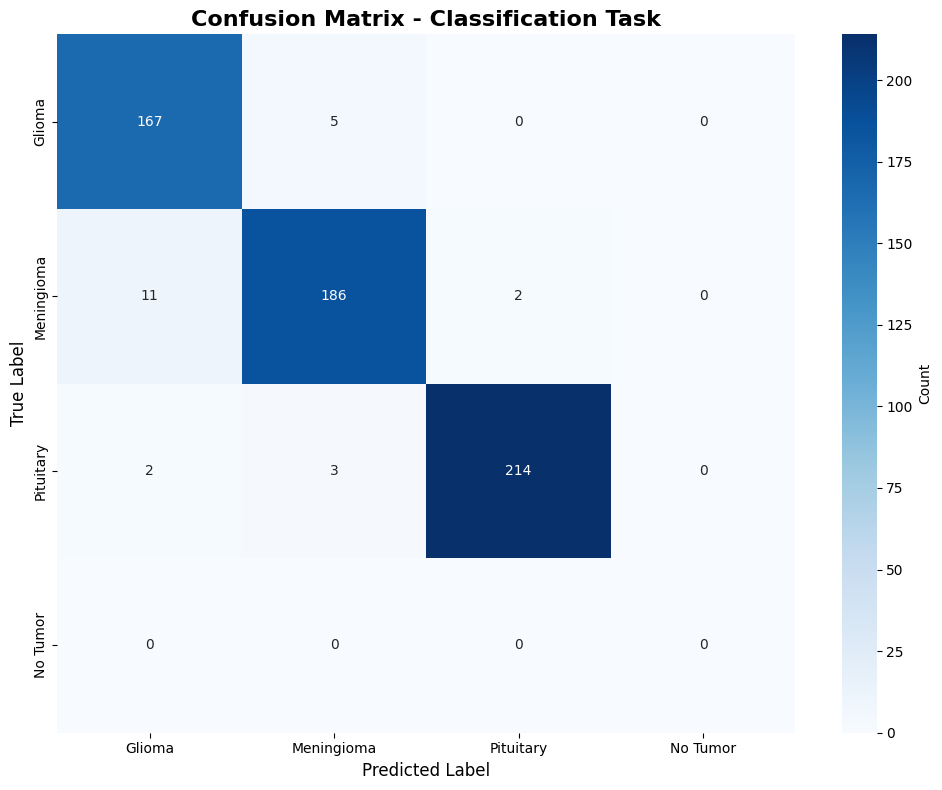

✓ Confusion matrix displayed


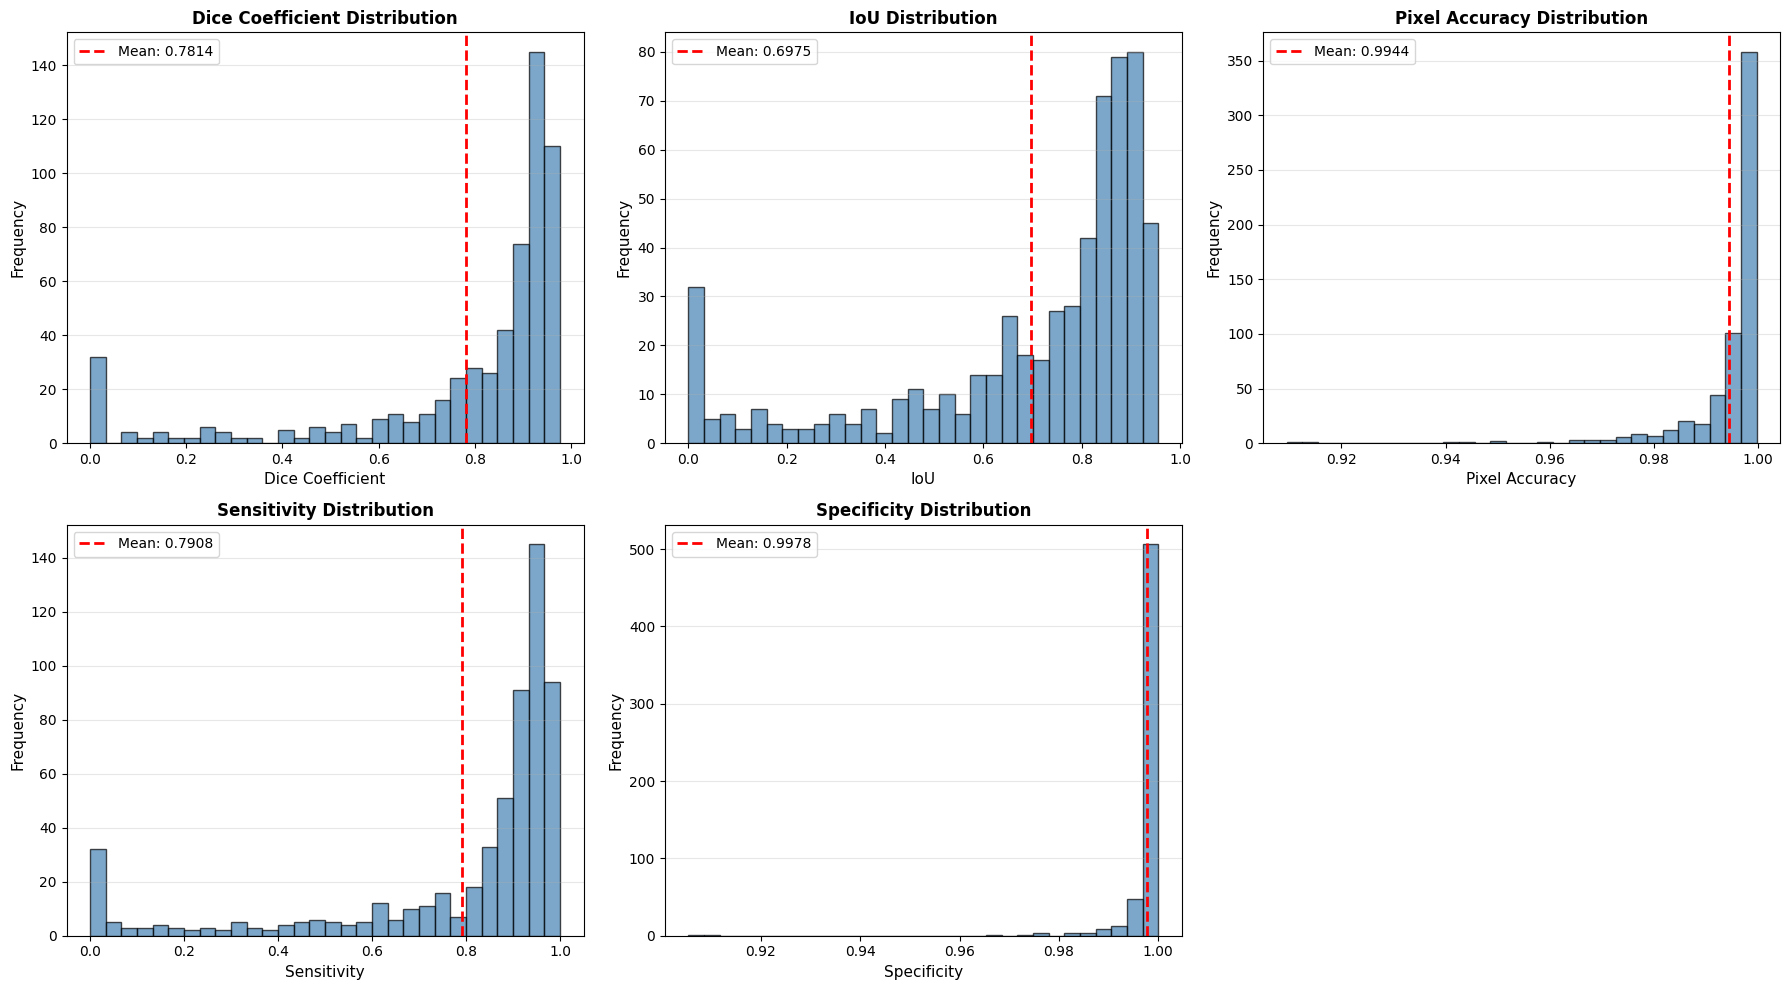

✓ Segmentation metrics distributions displayed


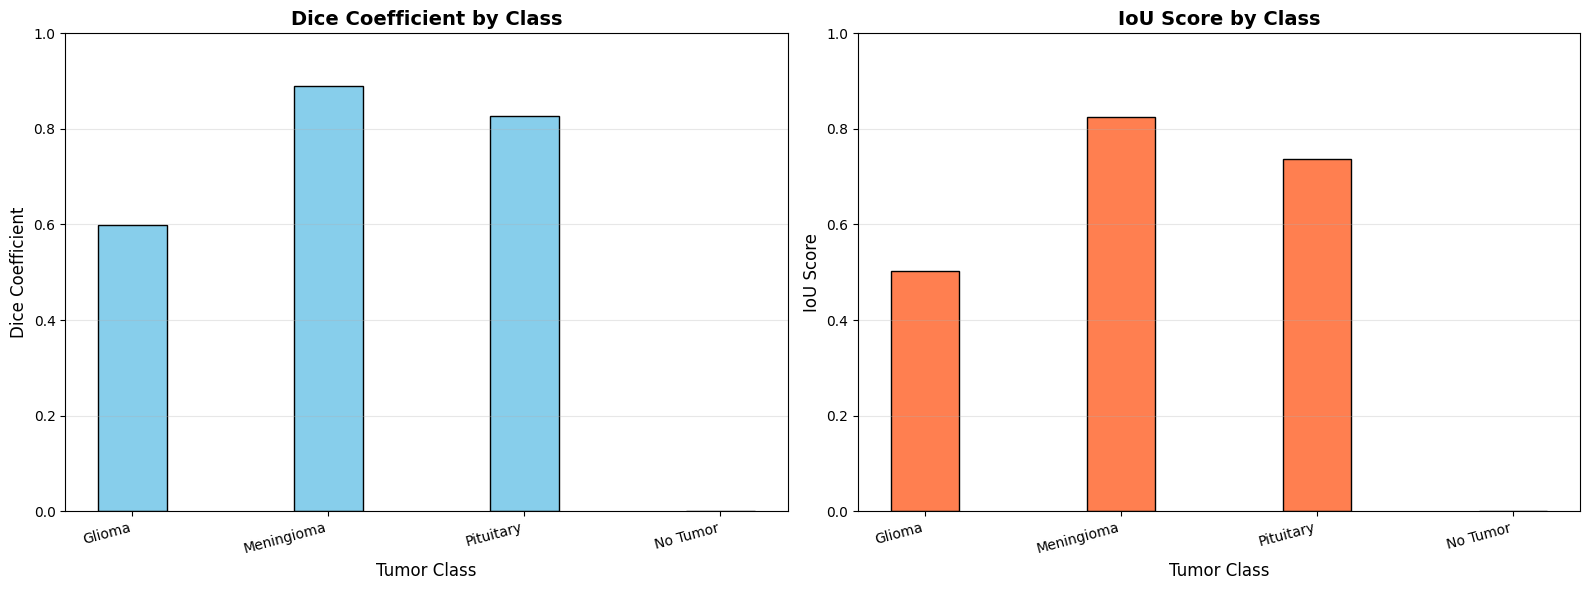

✓ Per-class segmentation performance displayed


/tmp/ipython-input-280060037.py:427: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


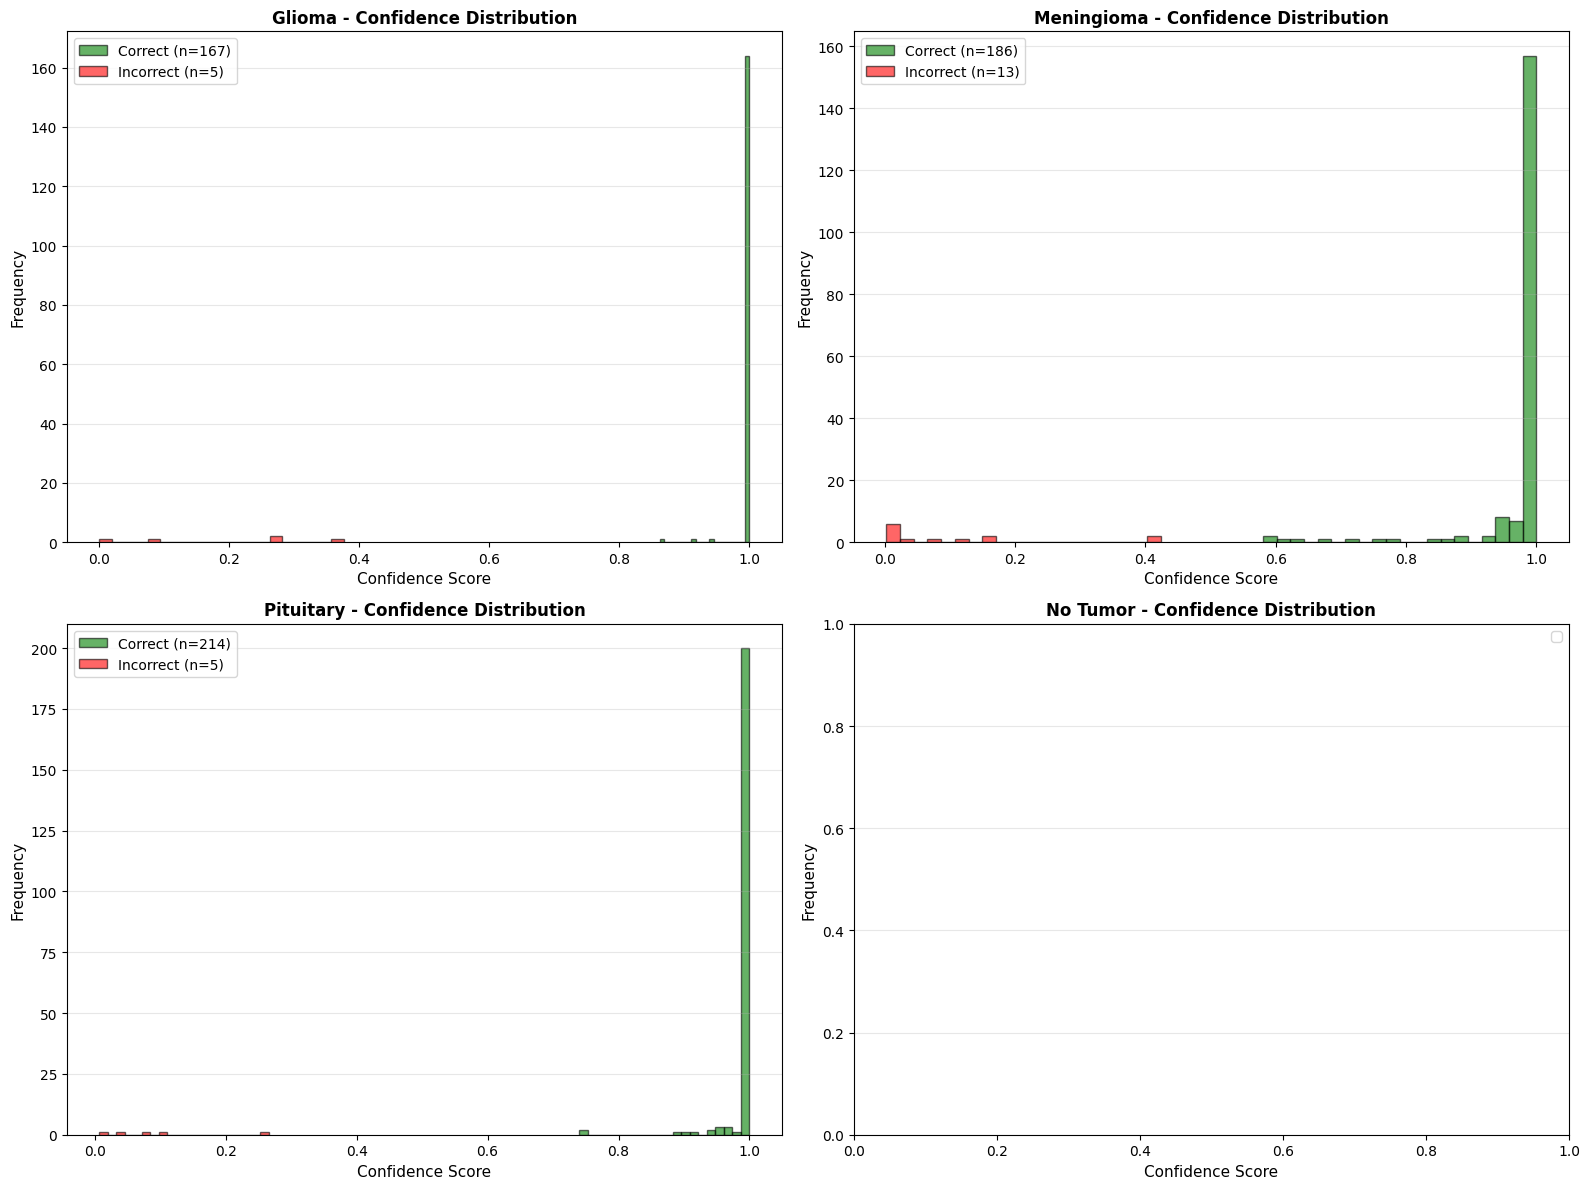

✓ Classification confidence distributions displayed

✓ All visualizations completed!

--------------------------------------------------------------------------------
SAMPLE PREDICTIONS VISUALIZATION
--------------------------------------------------------------------------------


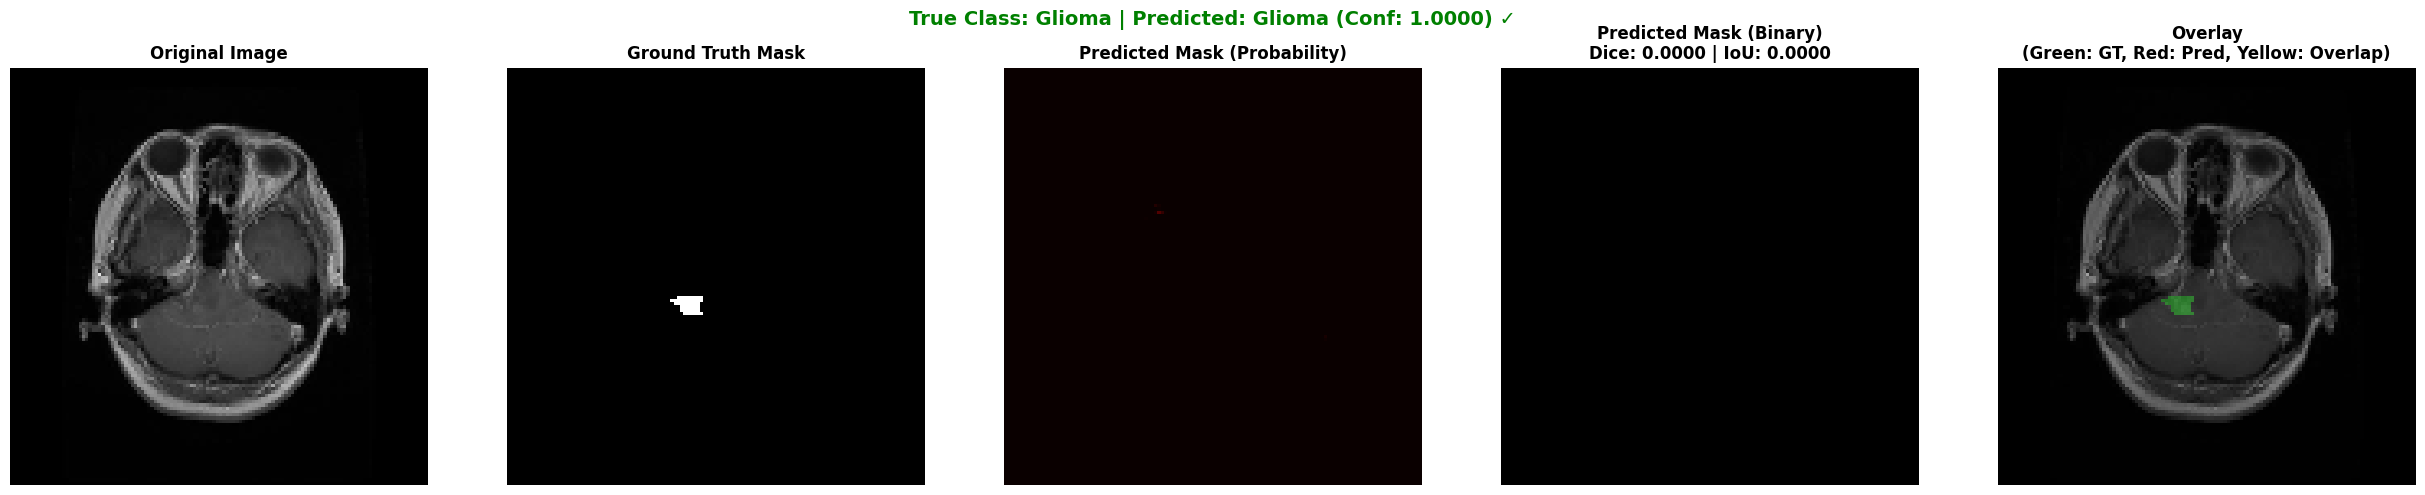

Sample 119: True=Glioma, Pred=Glioma, Dice=0.0000, IoU=0.0000


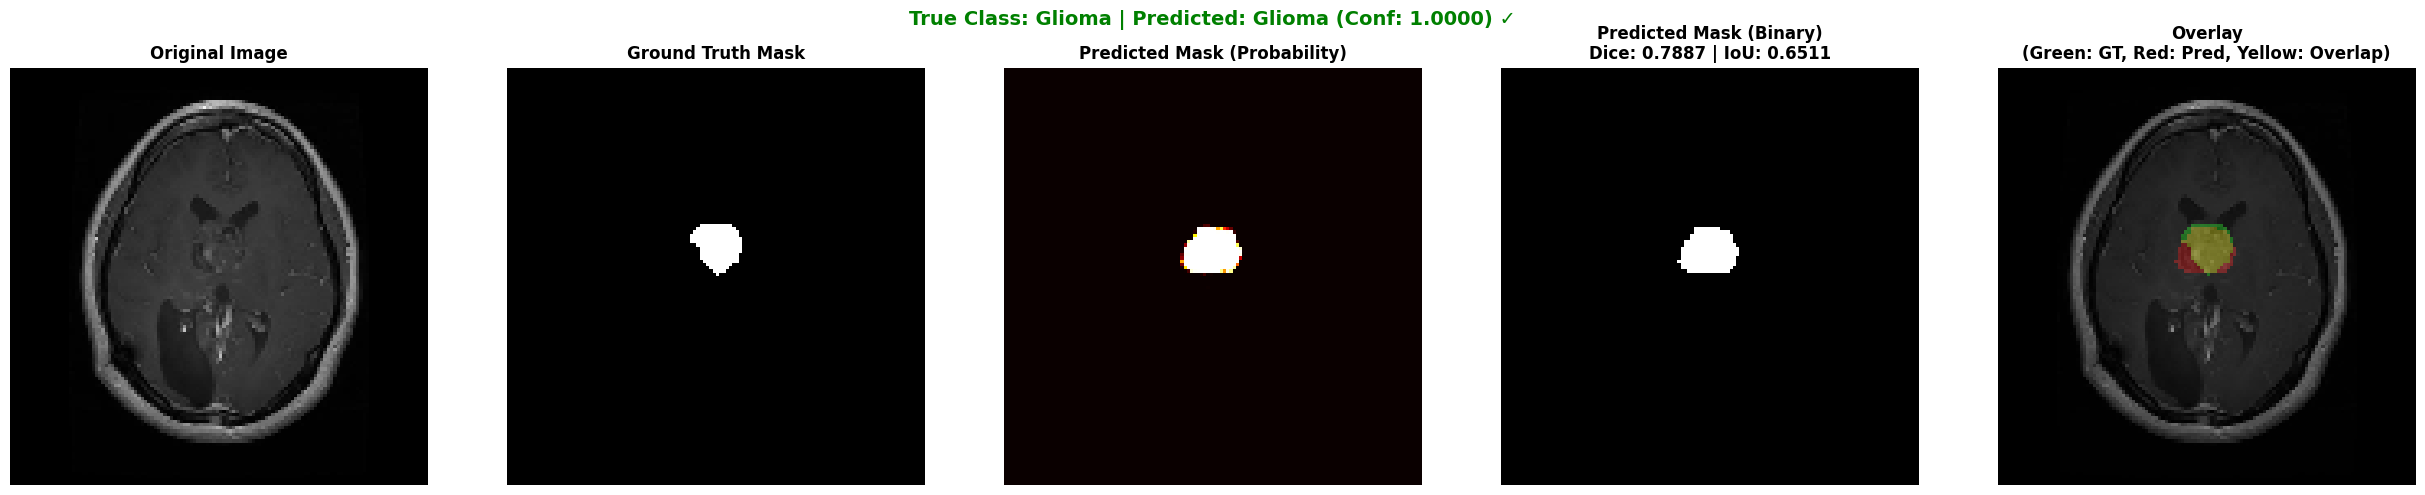

Sample 349: True=Glioma, Pred=Glioma, Dice=0.7887, IoU=0.6511


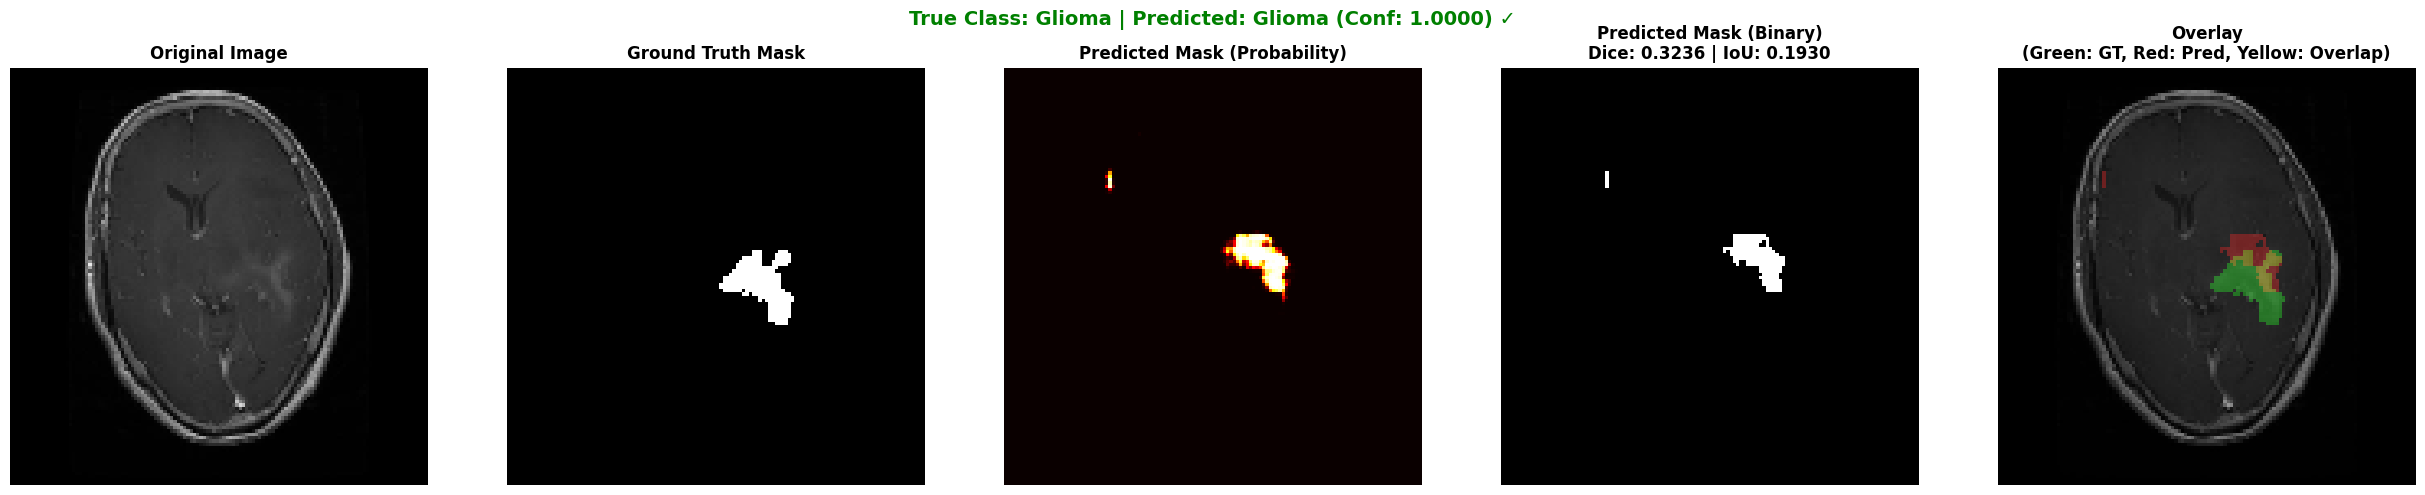

Sample 529: True=Glioma, Pred=Glioma, Dice=0.3236, IoU=0.1930


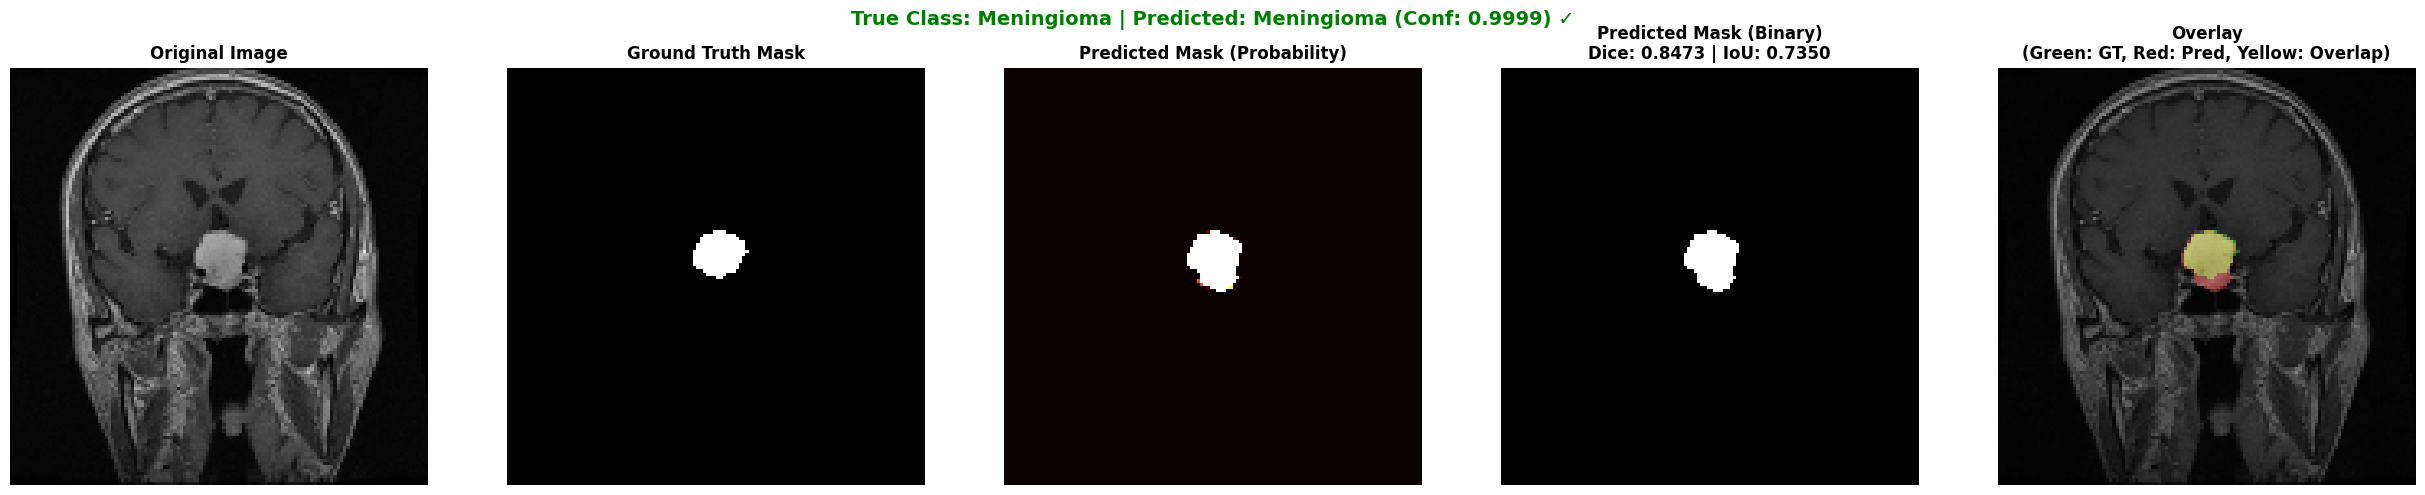

Sample 585: True=Meningioma, Pred=Meningioma, Dice=0.8473, IoU=0.7350


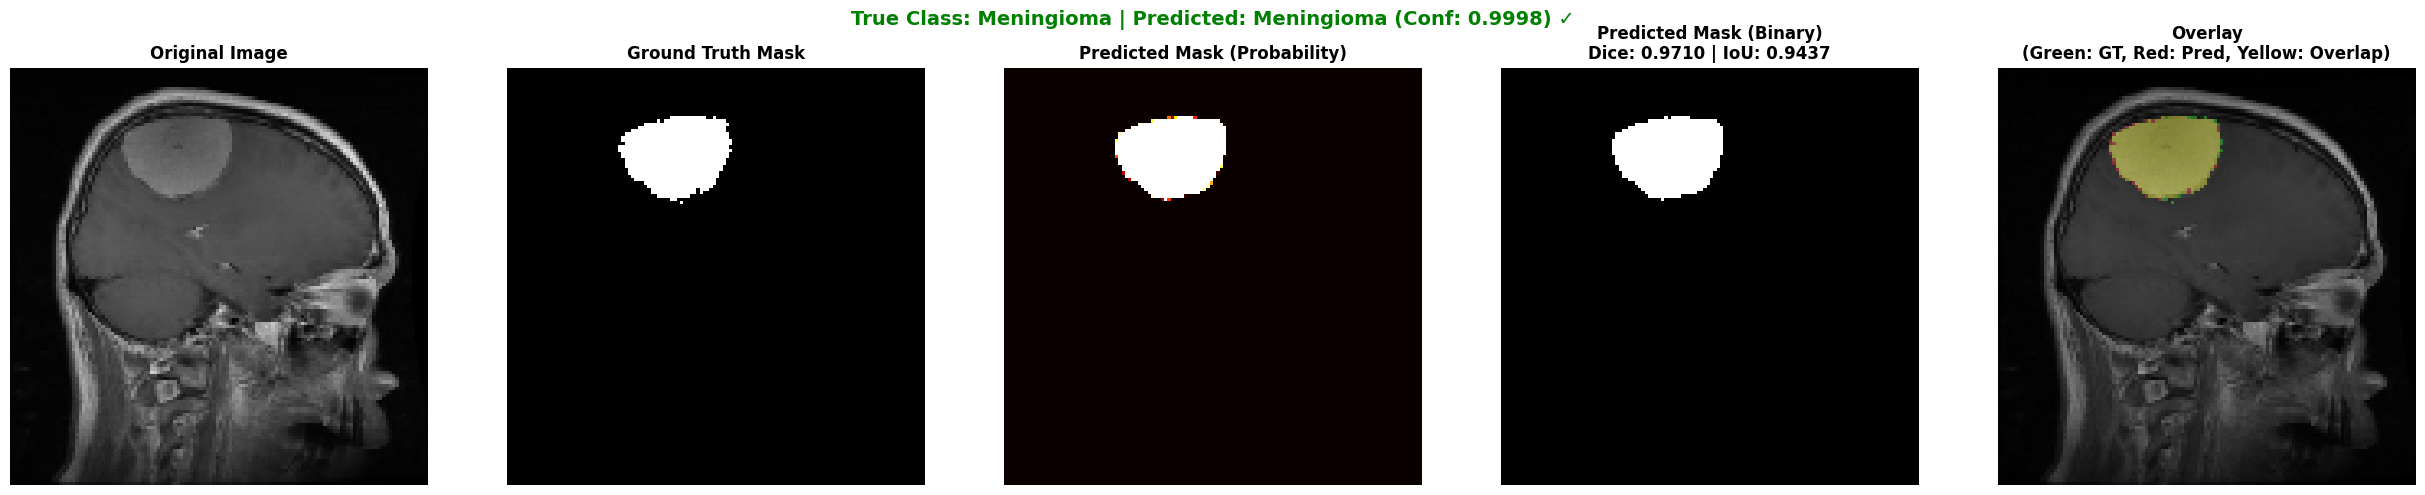

Sample 553: True=Meningioma, Pred=Meningioma, Dice=0.9710, IoU=0.9437


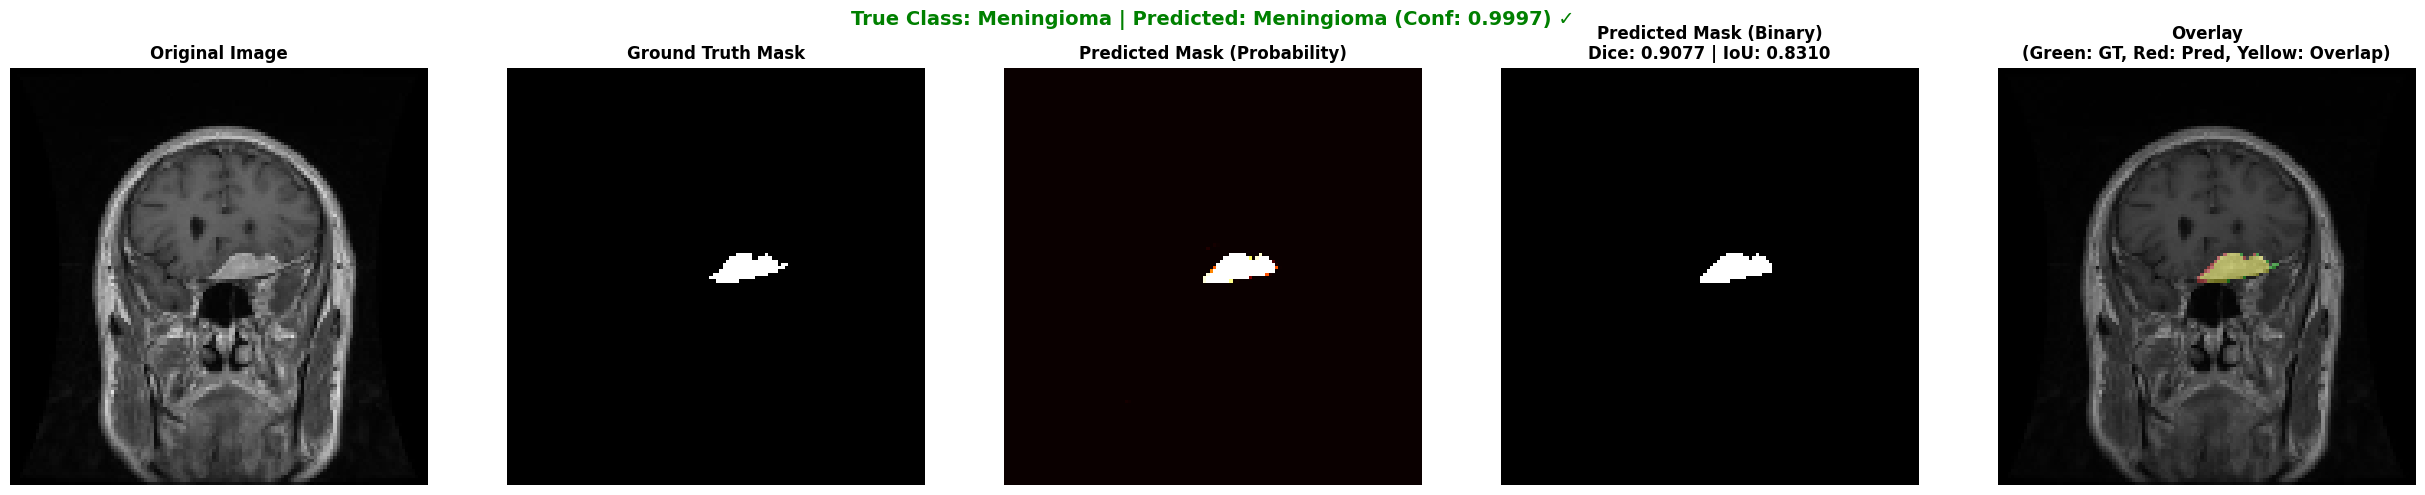

Sample 290: True=Meningioma, Pred=Meningioma, Dice=0.9077, IoU=0.8310


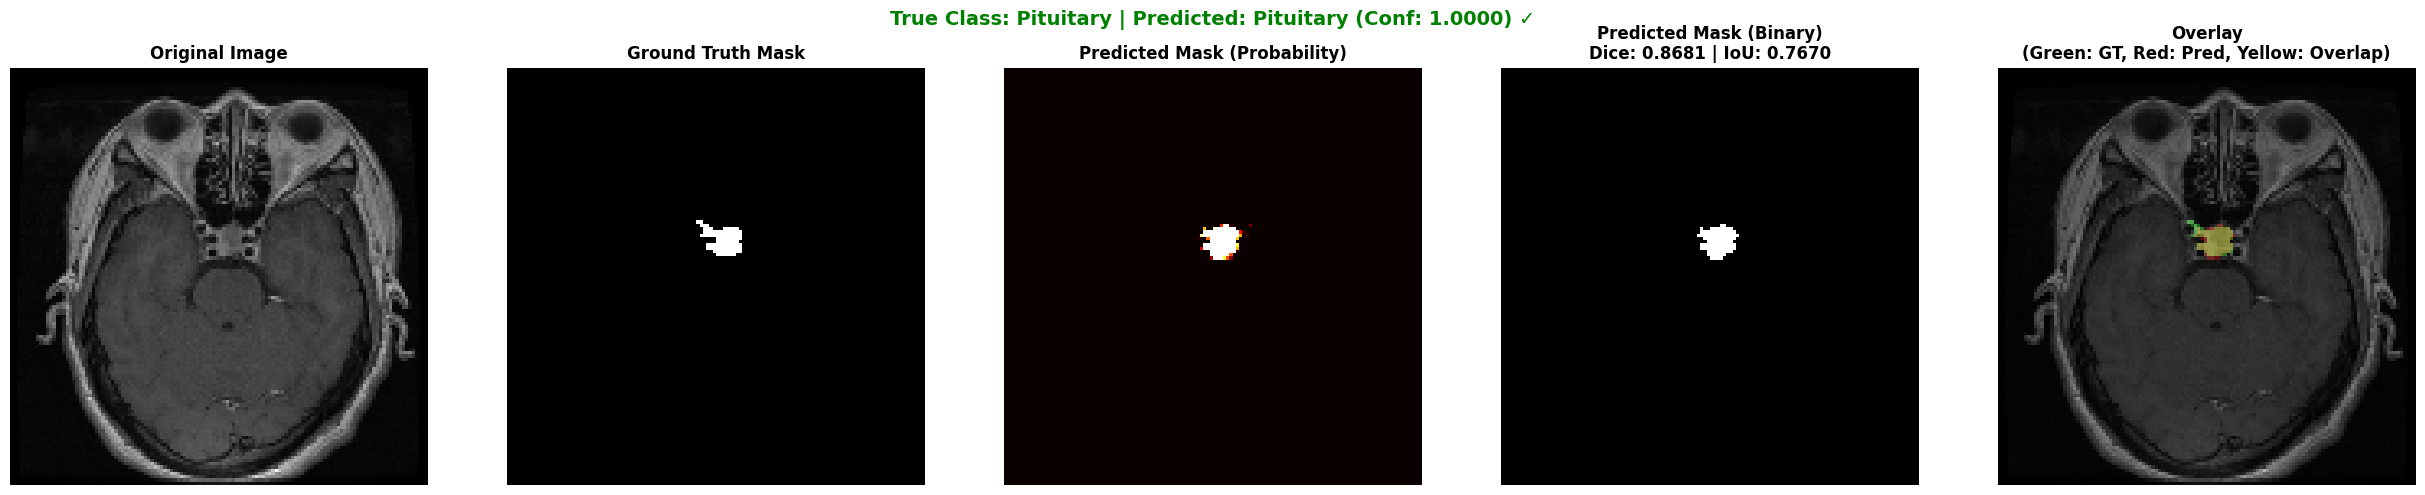

Sample 198: True=Pituitary, Pred=Pituitary, Dice=0.8681, IoU=0.7670


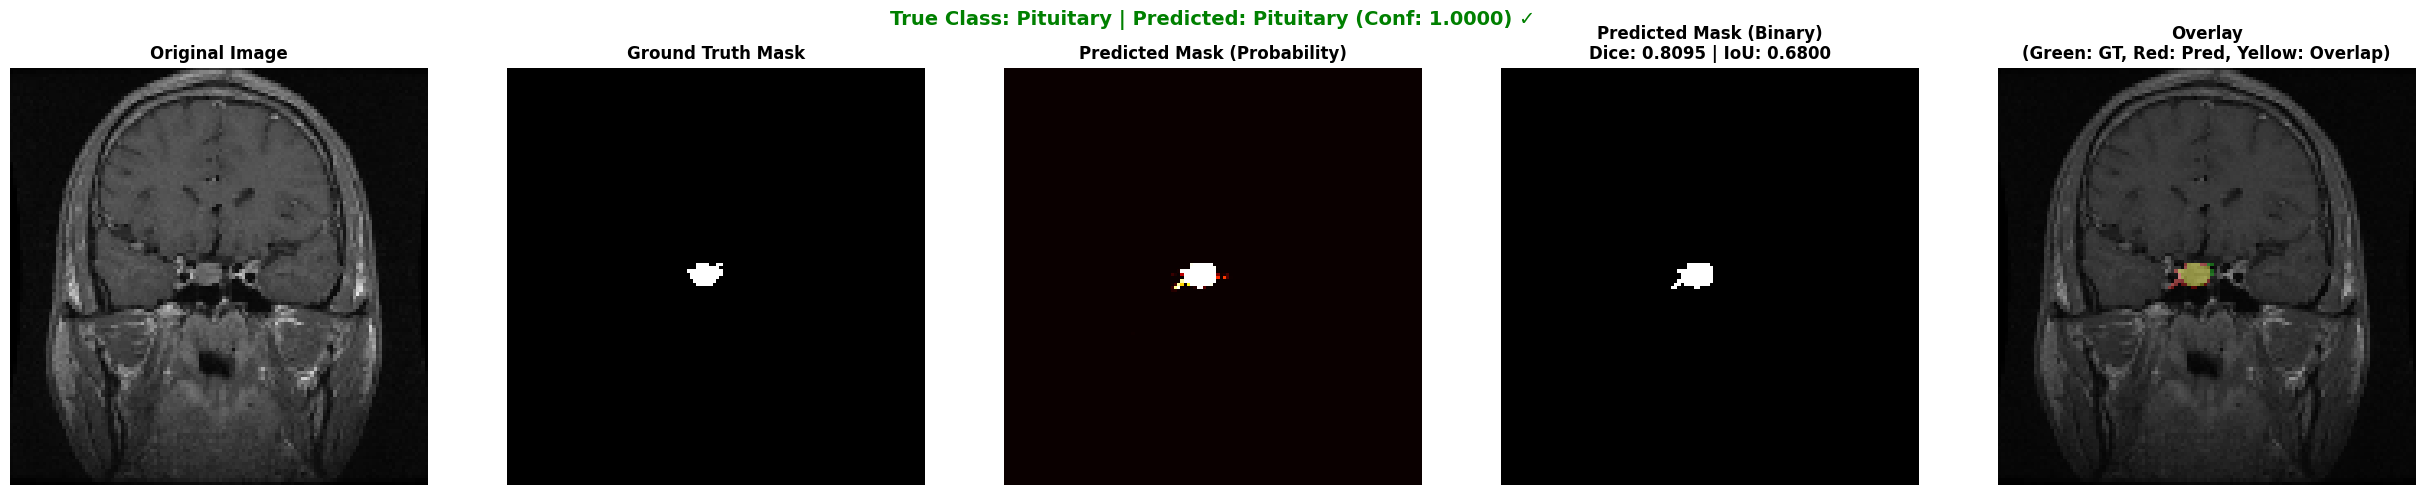

Sample 527: True=Pituitary, Pred=Pituitary, Dice=0.8095, IoU=0.6800


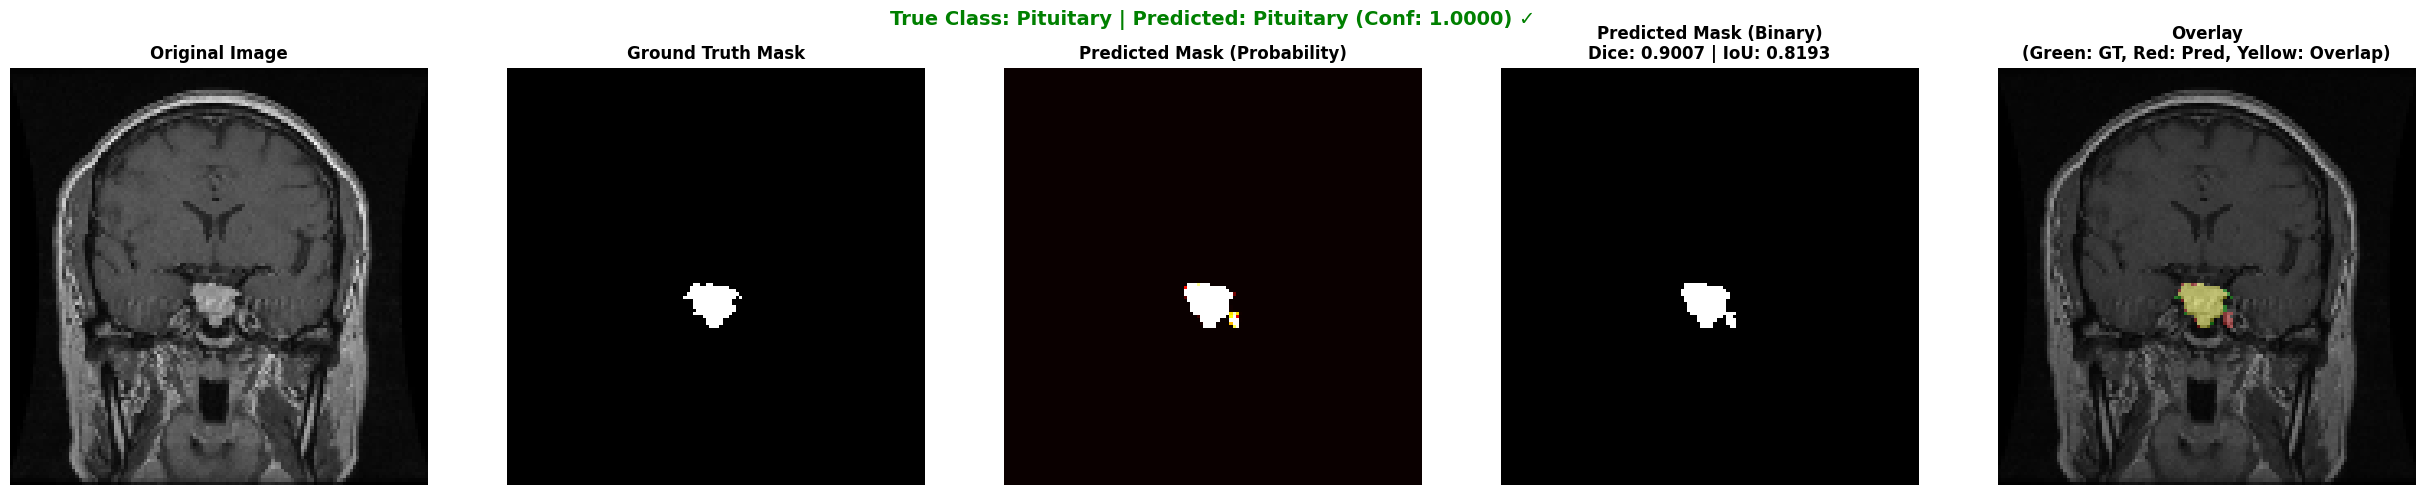

Sample 107: True=Pituitary, Pred=Pituitary, Dice=0.9007, IoU=0.8193

✓ Sample predictions visualization completed!

✓ Model saved to: /content/drive/MyDrive/Brain Tumor Segmentation and Classification/training_SupervisedLearning/brisc2025_multitask_unet_final.h5

VALIDATION ANALYSIS COMPLETED!


In [22]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import cv2
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from google.colab.patches import cv2_imshow
import pandas as pd
from scipy import ndimage

# ============================================================================
# CONFIGURATION
# ============================================================================
class Config:
    # Paths
    BASE_PATH = "/content/drive/MyDrive/Brain Tumor Segmentation and Classification/training_SupervisedLearning/brisc2025"
    MODEL_SAVE_PATH = "/content/drive/MyDrive/Brain Tumor Segmentation and Classification/training_SupervisedLearning"
    SEG_IMAGES = os.path.join(BASE_PATH, "segmentation_task/train/images")
    SEG_MASKS = os.path.join(BASE_PATH, "segmentation_task/train/masks")

    # Model params
    IMG_SIZE = (128, 128) # Changed from (256, 256) to match training configuration
    BATCH_SIZE = 8
    VALIDATION_SPLIT = 0.15

    # Class mapping
    CLASS_MAPPING = {
        'gl': 0,  # glioma
        'me': 1,  # meningioma
        'pi': 2,  # pituitary
        'nt': 3   # no tumor
    }
    CLASS_NAMES = ['Glioma', 'Meningioma', 'Pituitary', 'No Tumor']
    NUM_CLASSES = 4

config = Config()

# ============================================================================
# HELPER FUNCTIONS
# ============================================================================
def parse_filename(filename):
    """Extract metadata from BRISC2025 filename format"""
    basename = os.path.basename(filename)
    parts = basename.replace('.jpg', '').replace('.png', '').split('_')

    return {
        'split': parts[1],
        'index': parts[2],
        'tumor': parts[3],
        'view': parts[4],
        'sequence': parts[5]
    }

def load_validation_data():
    """Load validation dataset (same split as training)"""
    print("Loading validation dataset...")

    from sklearn.model_selection import train_test_split

    # Get all images
    image_paths = sorted(glob(os.path.join(config.SEG_IMAGES, "*.jpg")))
    mask_paths = sorted(glob(os.path.join(config.SEG_MASKS, "*.png")))

    # Extract labels
    labels = []
    for img_path in image_paths:
        metadata = parse_filename(img_path)
        tumor_code = metadata['tumor']
        labels.append(config.CLASS_MAPPING[tumor_code])

    # Same split as training
    _, val_imgs, _, val_masks, _, val_labels = train_test_split(
        image_paths, mask_paths, labels,
        test_size=config.VALIDATION_SPLIT,
        stratify=labels,
        random_state=42
    )

    print(f"Loaded {len(val_imgs)} validation samples")

    return val_imgs, val_masks, val_labels

def load_and_preprocess_image(img_path, mask_path=None):
    """Load and preprocess single image"""
    # Load image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, config.IMG_SIZE)
    img_normalized = img.astype(np.float32) / 255.0

    mask = None
    if mask_path:
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, config.IMG_SIZE, interpolation=cv2.INTER_NEAREST)
        mask = (mask > 127).astype(np.uint8)

    return img, img_normalized, mask

# ============================================================================
# SEGMENTATION METRICS
# ============================================================================
def calculate_iou(y_true, y_pred, threshold=0.5):
    """Calculate Intersection over Union"""
    y_pred_binary = (y_pred > threshold).astype(np.float32)
    intersection = np.sum(y_true * y_pred_binary)
    union = np.sum(y_true) + np.sum(y_pred_binary) - intersection

    if union == 0:
        return 1.0 if intersection == 0 else 0.0

    return intersection / union

def calculate_dice(y_true, y_pred, threshold=0.5):
    """Calculate Dice coefficient"""
    y_pred_binary = (y_pred > threshold).astype(np.float32)
    intersection = np.sum(y_true * y_pred_binary)

    if np.sum(y_true) + np.sum(y_pred_binary) == 0:
        return 1.0

    return (2. * intersection) / (np.sum(y_true) + np.sum(y_pred_binary))

def calculate_pixel_accuracy(y_true, y_pred, threshold=0.5):
    """Calculate pixel-wise accuracy"""
    y_pred_binary = (y_pred > threshold).astype(np.float32)
    return np.mean(y_true == y_pred_binary)

def calculate_sensitivity_specificity(y_true, y_pred, threshold=0.5):
    """Calculate sensitivity and specificity"""
    y_pred_binary = (y_pred > threshold).astype(np.float32)

    tp = np.sum((y_true == 1) & (y_pred_binary == 1))
    tn = np.sum((y_true == 0) & (y_pred_binary == 0))
    fp = np.sum((y_true == 0) & (y_pred_binary == 1))
    fn = np.sum((y_true == 1) & (y_pred_binary == 0))

    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    return sensitivity, specificity

# ============================================================================
# VALIDATION ANALYSIS
# ============================================================================
def validate_model(model, val_imgs, val_masks, val_labels):
    """Comprehensive validation analysis"""

    print("\n" + "="*80)
    print("VALIDATION ANALYSIS")
    print("="*80)

    # Storage for predictions
    all_seg_preds = []
    all_seg_true = []
    all_clf_preds = []
    all_clf_probs = []
    all_clf_true = []

    # Per-sample metrics
    dice_scores = []
    iou_scores = []
    pixel_accs = []
    sensitivities = []
    specificities = []

    print("\nRunning inference on validation set...")

    # Iterate through validation set
    for idx, (img_path, mask_path, label) in enumerate(zip(val_imgs, val_masks, val_labels)):
        # Load and preprocess
        _, img_normalized, mask_true = load_and_preprocess_image(img_path, mask_path)

        # Predict
        img_batch = np.expand_dims(img_normalized, axis=0)
        seg_pred, clf_pred = model.predict(img_batch, verbose=0)

        # Extract predictions
        seg_pred = seg_pred[0, :, :, 0]
        clf_prob = clf_pred[0]
        clf_class = np.argmax(clf_prob)

        # Store predictions
        all_seg_preds.append(seg_pred)
        all_seg_true.append(mask_true)
        all_clf_preds.append(clf_class)
        all_clf_probs.append(clf_prob)
        all_clf_true.append(label)

        # Calculate segmentation metrics
        dice = calculate_dice(mask_true, seg_pred)
        iou = calculate_iou(mask_true, seg_pred)
        pix_acc = calculate_pixel_accuracy(mask_true, seg_pred)
        sens, spec = calculate_sensitivity_specificity(mask_true, seg_pred)

        dice_scores.append(dice)
        iou_scores.append(iou)
        pixel_accs.append(pix_acc)
        sensitivities.append(sens)
        specificities.append(spec)

        if (idx + 1) % 100 == 0:
            print(f"  Processed {idx + 1}/{len(val_imgs)} samples...")

    print(f"✓ Completed inference on {len(val_imgs)} samples\n")

    # ========================================================================
    # SEGMENTATION ANALYSIS
    # ========================================================================
    print("\n" + "-"*80)
    print("SEGMENTATION METRICS")
    print("-"*80)

    seg_results = {
        'Dice Coefficient': dice_scores,
        'IoU': iou_scores,
        'Pixel Accuracy': pixel_accs,
        'Sensitivity': sensitivities,
        'Specificity': specificities
    }

    print("\nOverall Segmentation Performance:")
    print(f"{'Metric':<20} {'Mean':<12} {'Std':<12} {'Min':<12} {'Max':<12}")
    print("-" * 68)
    for metric_name, scores in seg_results.items():
        print(f"{metric_name:<20} {np.mean(scores):<12.4f} {np.std(scores):<12.4f} "
              f"{np.min(scores):<12.4f} {np.max(scores):<12.4f}")

    # Per-class segmentation analysis
    print("\n\nPer-Class Segmentation Performance:")
    print(f"{'Class':<15} {'Count':<8} {'Dice':<12} {'IoU':<12} {'Pixel Acc':<12}")
    print("-" * 63)

    for class_idx, class_name in enumerate(config.CLASS_NAMES):
        class_mask = np.array(all_clf_true) == class_idx
        if np.sum(class_mask) > 0:
            class_dice = np.mean([dice_scores[i] for i in range(len(dice_scores)) if class_mask[i]])
            class_iou = np.mean([iou_scores[i] for i in range(len(iou_scores)) if class_mask[i]])
            class_pix = np.mean([pixel_accs[i] for i in range(len(pixel_accs)) if class_mask[i]])

            print(f"{class_name:<15} {np.sum(class_mask):<8} {class_dice:<12.4f} "
                  f"{class_iou:<12.4f} {class_pix:<12.4f}")

    # ========================================================================
    # CLASSIFICATION ANALYSIS
    # ========================================================================
    print("\n" + "-"*80)
    print("CLASSIFICATION METRICS")
    print("-"*80)

    # Confusion Matrix
    cm = confusion_matrix(all_clf_true, all_clf_preds, labels=range(config.NUM_CLASSES))

    print("\nConfusion Matrix:")
    print(f"{'True\\Pred':<15}", end='')
    for name in config.CLASS_NAMES:
        print(f"{name[:8]:<12}", end='')
    print()
    print("-" * (15 + 12 * config.NUM_CLASSES))

    for i, name in enumerate(config.CLASS_NAMES):
        print(f"{name:<15}", end='')
        for j in range(config.NUM_CLASSES):
            print(f"{cm[i, j]:<12}", end='')
        print()

    # Classification Report
    print("\n\nClassification Report:")
    clf_report = classification_report(
        all_clf_true,
        all_clf_preds,
        target_names=config.CLASS_NAMES,
        labels=range(config.NUM_CLASSES),
        digits=4
    )
    print(clf_report)

    # Overall accuracy
    overall_acc = np.mean(np.array(all_clf_preds) == np.array(all_clf_true))
    print(f"\nOverall Classification Accuracy: {overall_acc:.4f}")

    # Per-class accuracy
    print("\nPer-Class Accuracy:")
    for i, name in enumerate(config.CLASS_NAMES):
        class_mask = np.array(all_clf_true) == i
        if np.sum(class_mask) > 0:
            class_acc = np.mean(np.array(all_clf_preds)[class_mask] == i)
            print(f"  {name:<15}: {class_acc:.4f} ({np.sum(class_mask)} samples)")

    # ========================================================================
    # VISUALIZATIONS
    # ========================================================================
    visualize_results(
        all_seg_true, all_seg_preds, all_clf_true, all_clf_preds, all_clf_probs,
        cm, seg_results
    )

    return {
        'segmentation': seg_results,
        'classification': {
            'confusion_matrix': cm,
            'predictions': all_clf_preds,
            'true_labels': all_clf_true,
            'probabilities': all_clf_probs
        }
    }

# ============================================================================
# VISUALIZATION
# ============================================================================
def visualize_results(seg_true, seg_preds, clf_true, clf_preds, clf_probs, cm, seg_results):
    """Create comprehensive visualizations"""

    print("\n" + "-"*80)
    print("GENERATING VISUALIZATIONS")
    print("-"*80)

    # 1. Confusion Matrix Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=config.CLASS_NAMES,
                yticklabels=config.CLASS_NAMES,
                cbar_kws={'label': 'Count'})
    plt.title('Confusion Matrix - Classification Task', fontsize=16, fontweight='bold')
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.tight_layout()
    plt.show()
    print("✓ Confusion matrix displayed")

    # 2. Segmentation Metrics Distribution
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()

    metrics_list = ['Dice Coefficient', 'IoU', 'Pixel Accuracy',
                    'Sensitivity', 'Specificity']

    for idx, (metric_name, scores) in enumerate(seg_results.items()):
        ax = axes[idx]
        ax.hist(scores, bins=30, color='steelblue', alpha=0.7, edgecolor='black')
        ax.axvline(np.mean(scores), color='red', linestyle='--', linewidth=2,
                   label=f'Mean: {np.mean(scores):.4f}')
        ax.set_xlabel(metric_name, fontsize=11)
        ax.set_ylabel('Frequency', fontsize=11)
        ax.set_title(f'{metric_name} Distribution', fontsize=12, fontweight='bold')
        ax.legend()
        ax.grid(axis='y', alpha=0.3)

    # Remove extra subplot
    fig.delaxes(axes[5])

    plt.tight_layout()
    plt.show()
    print("✓ Segmentation metrics distributions displayed")

    # 3. Per-Class Segmentation Performance
    class_dice_means = []
    class_iou_means = []

    for class_idx in range(config.NUM_CLASSES):
        class_mask = np.array(clf_true) == class_idx
        if np.sum(class_mask) > 0:
            class_dice_means.append(np.mean([seg_results['Dice Coefficient'][i]
                                             for i in range(len(clf_true)) if class_mask[i]]))
            class_iou_means.append(np.mean([seg_results['IoU'][i]
                                            for i in range(len(clf_true)) if class_mask[i]]))
        else:
            class_dice_means.append(0)
            class_iou_means.append(0)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    x = np.arange(len(config.CLASS_NAMES))
    width = 0.35

    ax1.bar(x, class_dice_means, width, label='Dice', color='skyblue', edgecolor='black')
    ax1.set_xlabel('Tumor Class', fontsize=12)
    ax1.set_ylabel('Dice Coefficient', fontsize=12)
    ax1.set_title('Dice Coefficient by Class', fontsize=14, fontweight='bold')
    ax1.set_xticks(x)
    ax1.set_xticklabels(config.CLASS_NAMES, rotation=15, ha='right')
    ax1.set_ylim([0, 1])
    ax1.grid(axis='y', alpha=0.3)

    ax2.bar(x, class_iou_means, width, label='IoU', color='coral', edgecolor='black')
    ax2.set_xlabel('Tumor Class', fontsize=12)
    ax2.set_ylabel('IoU Score', fontsize=12)
    ax2.set_title('IoU Score by Class', fontsize=14, fontweight='bold')
    ax2.set_xticks(x)
    ax2.set_xticklabels(config.CLASS_NAMES, rotation=15, ha='right')
    ax2.set_ylim([0, 1])
    ax2.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()
    print("✓ Per-class segmentation performance displayed")

    # 4. Classification Confidence Distribution
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()

    for class_idx, class_name in enumerate(config.CLASS_NAMES):
        ax = axes[class_idx]

        # Get confidence scores for this class
        class_probs = [clf_probs[i][class_idx] for i in range(len(clf_probs))]

        # Separate correct and incorrect predictions
        correct_probs = [clf_probs[i][class_idx] for i in range(len(clf_probs))
                         if clf_true[i] == class_idx and clf_preds[i] == class_idx]
        incorrect_probs = [clf_probs[i][class_idx] for i in range(len(clf_probs))
                           if clf_true[i] == class_idx and clf_preds[i] != class_idx]

        if correct_probs:
            ax.hist(correct_probs, bins=20, alpha=0.6, color='green',
                    label=f'Correct (n={len(correct_probs)})', edgecolor='black')
        if incorrect_probs:
            ax.hist(incorrect_probs, bins=20, alpha=0.6, color='red',
                    label=f'Incorrect (n={len(incorrect_probs)})', edgecolor='black')

        ax.set_xlabel('Confidence Score', fontsize=11)
        ax.set_ylabel('Frequency', fontsize=11)
        ax.set_title(f'{class_name} - Confidence Distribution', fontsize=12, fontweight='bold')
        ax.legend()
        ax.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()
    print("✓ Classification confidence distributions displayed")

    print("\n✓ All visualizations completed!")

# ============================================================================
# PREDICTION VISUALIZATION
# ============================================================================
def visualize_predictions(model, val_imgs, val_masks, val_labels, num_samples=10):
    """Visualize model predictions on sample images"""

    print("\n" + "-"*80)
    print("SAMPLE PREDICTIONS VISUALIZATION")
    print("-"*80)

    # Select random samples from each class
    samples_per_class = num_samples // config.NUM_CLASSES
    selected_indices = []

    for class_idx in range(config.NUM_CLASSES):
        class_indices = [i for i, label in enumerate(val_labels) if label == class_idx]
        if len(class_indices) >= samples_per_class:
            selected = np.random.choice(class_indices, samples_per_class, replace=False)
            selected_indices.extend(selected)

    for idx in selected_indices:
        img_path = val_imgs[idx]
        mask_path = val_masks[idx]
        true_label = val_labels[idx]

        # Load image
        img_original, img_normalized, mask_true = load_and_preprocess_image(img_path, mask_path)

        # Predict
        img_batch = np.expand_dims(img_normalized, axis=0)
        seg_pred, clf_pred = model.predict(img_batch, verbose=0)

        seg_pred = seg_pred[0, :, :, 0]
        seg_pred_binary = (seg_pred > 0.5).astype(np.uint8)
        clf_prob = clf_pred[0]
        clf_class = np.argmax(clf_prob)

        # Calculate metrics
        dice = calculate_dice(mask_true, seg_pred)
        iou = calculate_iou(mask_true, seg_pred)

        # Create visualization
        fig, axes = plt.subplots(1, 5, figsize=(25, 5))

        # Original image
        axes[0].imshow(img_original)
        axes[0].set_title('Original Image', fontsize=12, fontweight='bold')
        axes[0].axis('off')

        # True mask
        axes[1].imshow(mask_true, cmap='gray')
        axes[1].set_title('Ground Truth Mask', fontsize=12, fontweight='bold')
        axes[1].axis('off')

        # Predicted mask (probability)
        axes[2].imshow(seg_pred, cmap='hot', vmin=0, vmax=1)
        axes[2].set_title('Predicted Mask (Probability)', fontsize=12, fontweight='bold')
        axes[2].axis('off')

        # Predicted mask (binary)
        axes[3].imshow(seg_pred_binary, cmap='gray')
        axes[3].set_title(f'Predicted Mask (Binary)\nDice: {dice:.4f} | IoU: {iou:.4f}',
                         fontsize=12, fontweight='bold')
        axes[3].axis('off')

        # Overlay
        overlay = img_original.copy()
        mask_colored = np.zeros_like(overlay)
        mask_colored[seg_pred_binary == 1] = [255, 0, 0]  # Red for predicted
        mask_colored[mask_true == 1] = [0, 255, 0]  # Green for true
        # Yellow where they overlap
        overlap = (seg_pred_binary == 1) & (mask_true == 1)
        mask_colored[overlap] = [255, 255, 0]

        overlay = cv2.addWeighted(overlay, 0.7, mask_colored, 0.3, 0)
        axes[4].imshow(overlay)
        axes[4].set_title('Overlay\n(Green: GT, Red: Pred, Yellow: Overlap)',
                         fontsize=12, fontweight='bold')
        axes[4].axis('off')

        # Add classification info
        true_class_name = config.CLASS_NAMES[true_label]
        pred_class_name = config.CLASS_NAMES[clf_class]
        confidence = clf_prob[clf_class]

        classification_correct = "✓" if clf_class == true_label else "✗"
        color = 'green' if clf_class == true_label else 'red'

        fig.suptitle(
            f'True Class: {true_class_name} | Predicted: {pred_class_name} '
            f'(Conf: {confidence:.4f}) {classification_correct}',
            fontsize=14, fontweight='bold', color=color
        )

        plt.tight_layout()
        plt.show()

        print(f"Sample {idx + 1}: True={true_class_name}, Pred={pred_class_name}, "
              f"Dice={dice:.4f}, IoU={iou:.4f}")

    print("\n✓ Sample predictions visualization completed!")

# ============================================================================
# MAIN EXECUTION
# ============================================================================
def main():
    """Main validation and analysis pipeline"""

    print("="*80)
    print("BRISC2025 MODEL VALIDATION & ANALYSIS")
    print("="*80)

    # Find the latest model
    checkpoint_dir = os.path.join(config.BASE_PATH, "checkpoints")
    model_files = glob(os.path.join(checkpoint_dir, "multitask_unet_*.h5"))

    if not model_files:
        print("\n❌ No model found! Please train the model first.")
        return

    latest_model = max(model_files, key=os.path.getctime)
    print(f"\nLoading model: {os.path.basename(latest_model)}")

    # Load model
    model = keras.models.load_model(
        latest_model,
        custom_objects={
            'dice_coefficient': lambda y_true, y_pred: 1 - tf.reduce_mean(
                (2. * tf.reduce_sum(y_true * y_pred) + 1e-6) /
                (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + 1e-6)
            ),
            'dice_loss': lambda y_true, y_pred: 1 - tf.reduce_mean(
                (2. * tf.reduce_sum(y_true * y_pred) + 1e-6) /
                (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + 1e-6)
            )
        }
    )
    print("✓ Model loaded successfully!")

    # Load validation data
    val_imgs, val_masks, val_labels = load_validation_data()

    # Run comprehensive validation
    results = validate_model(model, val_imgs, val_masks, val_labels)

    # Visualize sample predictions
    visualize_predictions(model, val_imgs, val_masks, val_labels, num_samples=12)

    # Save model to specified location
    final_model_path = os.path.join(config.MODEL_SAVE_PATH, "brisc2025_multitask_unet_final.h5")
    model.save(final_model_path)
    print(f"\n✓ Model saved to: {final_model_path}")

    print("\n" + "="*80)
    print("VALIDATION ANALYSIS COMPLETED!")
    print("="*80)

    return results

if __name__ == "__main__":
    results = main()

#test

Loading test dataset...
Loaded 860 test samples

Test set class distribution:
  Glioma: 254
  Meningioma: 306
  Pituitary: 300

Loading trained model...
✓ Model loaded successfully

TEST SET EVALUATION

Running inference on test set...
  Processed 100/860 samples...
  Processed 200/860 samples...
  Processed 300/860 samples...
  Processed 400/860 samples...
  Processed 500/860 samples...
  Processed 600/860 samples...
  Processed 700/860 samples...
  Processed 800/860 samples...

✓ Completed inference on 860 samples

--------------------------------------------------------------------------------
SEGMENTATION PERFORMANCE ON TEST SET
--------------------------------------------------------------------------------

Overall Metrics:
  Mean Dice Coefficient: 0.7970 ± 0.2473
  Mean IoU Score:        0.7144 ± 0.2571

Per-Class Segmentation:
  Glioma         : Dice=0.6436, IoU=0.5464
  Meningioma     : Dice=0.8975, IoU=0.8385
  Pituitary      : Dice=0.8242, IoU=0.7299

-----------------------

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/me

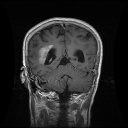


2. Ground Truth Mask:


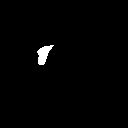


3. Predicted Mask:


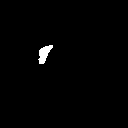


4. Overlay (Green: GT, Red: Pred, Yellow: Overlap):


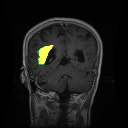


SAMPLE 2/5 (Index: 800)

PREDICTION DETAILS
True Class:       Pituitary
Predicted Class:  Pituitary (Confidence: 0.5198)
Classification:   ✓ CORRECT
Dice Coefficient: 0.9612
IoU Score:        0.9252

1. Original Image:


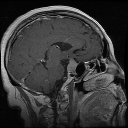


2. Ground Truth Mask:


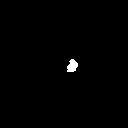


3. Predicted Mask:


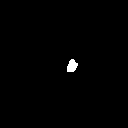


4. Overlay (Green: GT, Red: Pred, Yellow: Overlap):


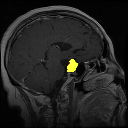


SAMPLE 3/5 (Index: 625)

PREDICTION DETAILS
True Class:       Pituitary
Predicted Class:  Pituitary (Confidence: 1.0000)
Classification:   ✓ CORRECT
Dice Coefficient: 0.8591
IoU Score:        0.7529

1. Original Image:


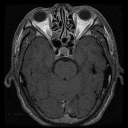


2. Ground Truth Mask:


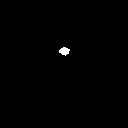


3. Predicted Mask:


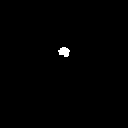


4. Overlay (Green: GT, Red: Pred, Yellow: Overlap):


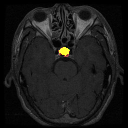


SAMPLE 4/5 (Index: 643)

PREDICTION DETAILS
True Class:       Pituitary
Predicted Class:  Pituitary (Confidence: 1.0000)
Classification:   ✓ CORRECT
Dice Coefficient: 0.7520
IoU Score:        0.6026

1. Original Image:


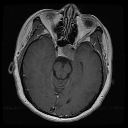


2. Ground Truth Mask:


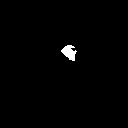


3. Predicted Mask:


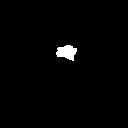


4. Overlay (Green: GT, Red: Pred, Yellow: Overlap):


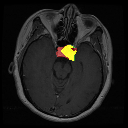


SAMPLE 5/5 (Index: 104)

PREDICTION DETAILS
True Class:       Glioma
Predicted Class:  Glioma (Confidence: 1.0000)
Classification:   ✓ CORRECT
Dice Coefficient: 0.6241
IoU Score:        0.4536

1. Original Image:


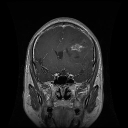


2. Ground Truth Mask:


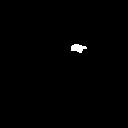


3. Predicted Mask:


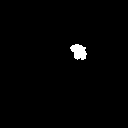


4. Overlay (Green: GT, Red: Pred, Yellow: Overlap):


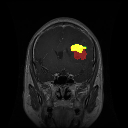


VISUALIZING 2 SAMPLES PER CLASS

CLASS: Glioma

--------------------------------------------------------------------------------
Glioma - Sample 1
--------------------------------------------------------------------------------

PREDICTION DETAILS
True Class:       Glioma
Predicted Class:  Glioma (Confidence: 1.0000)
Classification:   ✓ CORRECT
Dice Coefficient: 0.9313
IoU Score:        0.8713

1. Original Image:


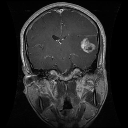


2. Ground Truth Mask:


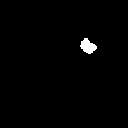


3. Predicted Mask:


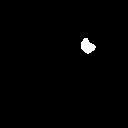


4. Overlay (Green: GT, Red: Pred, Yellow: Overlap):


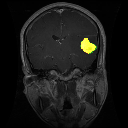


--------------------------------------------------------------------------------
Glioma - Sample 2
--------------------------------------------------------------------------------

PREDICTION DETAILS
True Class:       Glioma
Predicted Class:  Glioma (Confidence: 0.9977)
Classification:   ✓ CORRECT
Dice Coefficient: 0.9319
IoU Score:        0.8725

1. Original Image:


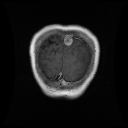


2. Ground Truth Mask:


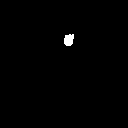


3. Predicted Mask:


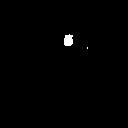


4. Overlay (Green: GT, Red: Pred, Yellow: Overlap):


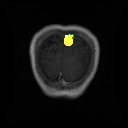


CLASS: Meningioma

--------------------------------------------------------------------------------
Meningioma - Sample 1
--------------------------------------------------------------------------------

PREDICTION DETAILS
True Class:       Meningioma
Predicted Class:  Meningioma (Confidence: 0.9991)
Classification:   ✓ CORRECT
Dice Coefficient: 0.9310
IoU Score:        0.8710

1. Original Image:


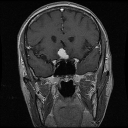


2. Ground Truth Mask:


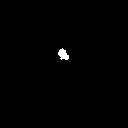


3. Predicted Mask:


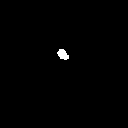


4. Overlay (Green: GT, Red: Pred, Yellow: Overlap):


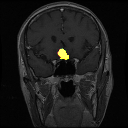


--------------------------------------------------------------------------------
Meningioma - Sample 2
--------------------------------------------------------------------------------

PREDICTION DETAILS
True Class:       Meningioma
Predicted Class:  Meningioma (Confidence: 0.9967)
Classification:   ✓ CORRECT
Dice Coefficient: 0.8591
IoU Score:        0.7530

1. Original Image:


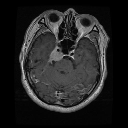


2. Ground Truth Mask:


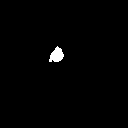


3. Predicted Mask:


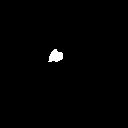


4. Overlay (Green: GT, Red: Pred, Yellow: Overlap):


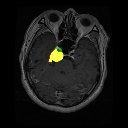


CLASS: Pituitary

--------------------------------------------------------------------------------
Pituitary - Sample 1
--------------------------------------------------------------------------------

PREDICTION DETAILS
True Class:       Pituitary
Predicted Class:  Pituitary (Confidence: 0.9999)
Classification:   ✓ CORRECT
Dice Coefficient: 0.9672
IoU Score:        0.9364

1. Original Image:


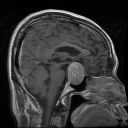


2. Ground Truth Mask:


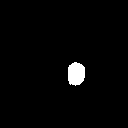


3. Predicted Mask:


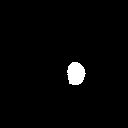


4. Overlay (Green: GT, Red: Pred, Yellow: Overlap):


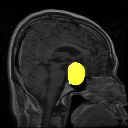


--------------------------------------------------------------------------------
Pituitary - Sample 2
--------------------------------------------------------------------------------

PREDICTION DETAILS
True Class:       Pituitary
Predicted Class:  Pituitary (Confidence: 0.9999)
Classification:   ✓ CORRECT
Dice Coefficient: 0.9333
IoU Score:        0.8750

1. Original Image:


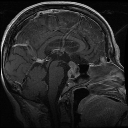


2. Ground Truth Mask:


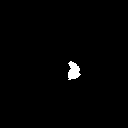


3. Predicted Mask:


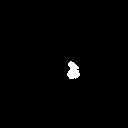


4. Overlay (Green: GT, Red: Pred, Yellow: Overlap):


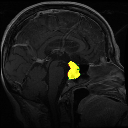


CLASS: No Tumor
No samples found for class No Tumor

GENERATING TEST SET PLOTS


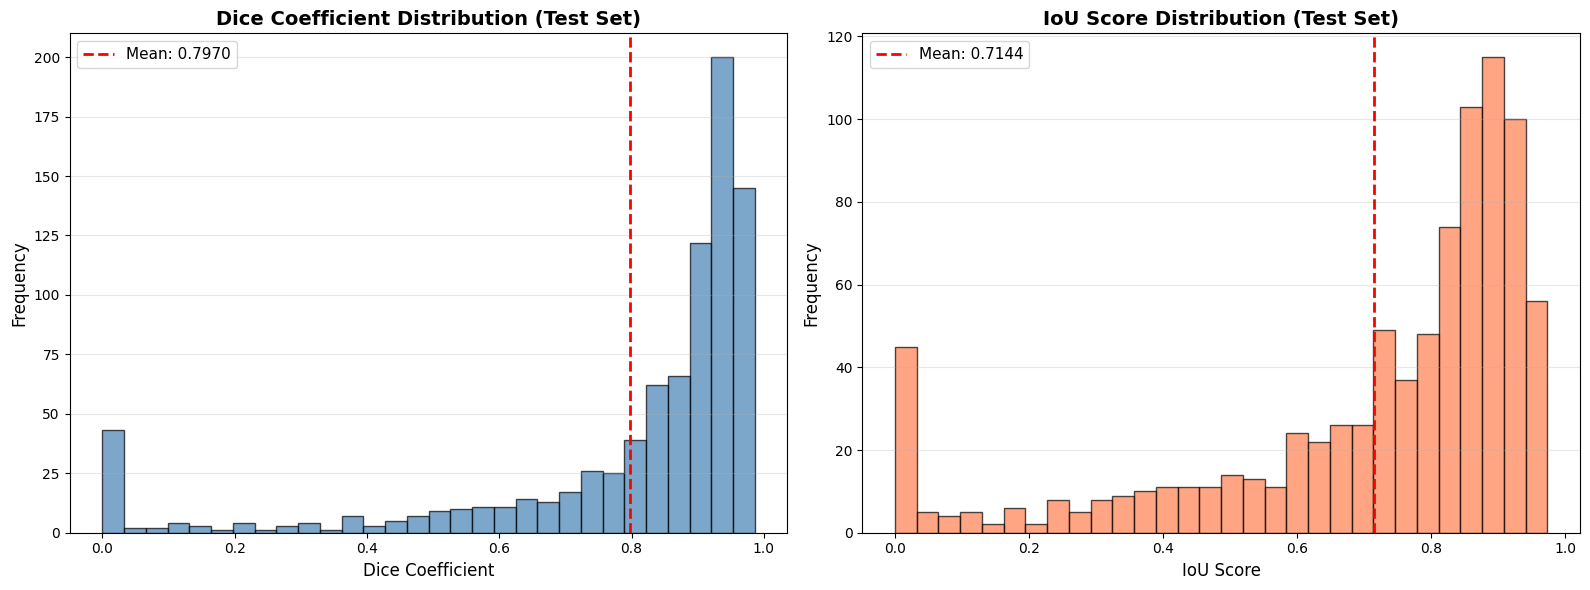

✓ Metrics distributions displayed


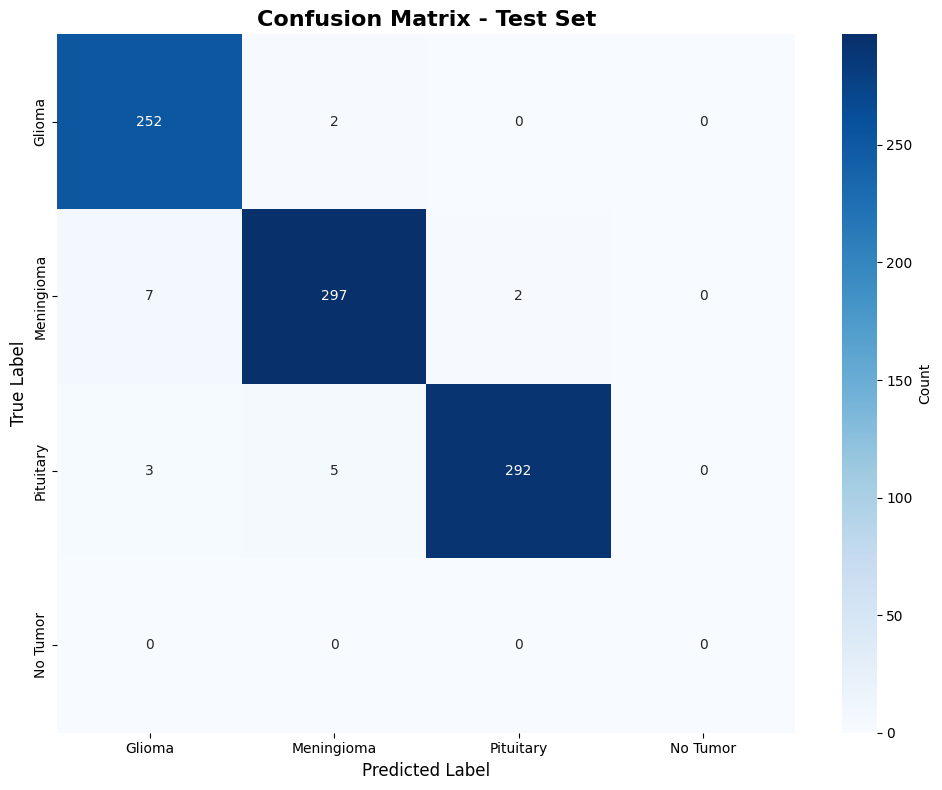

✓ Confusion matrix displayed


In [26]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import cv2
from glob import glob
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.metrics import confusion_matrix, classification_report

# ============================================================================
# CONFIGURATION
# ============================================================================
class Config:
    # Paths
    BASE_PATH = "/content/drive/MyDrive/Brain Tumor Segmentation and Classification/training_SupervisedLearning/brisc2025"
    MODEL_PATH = "/content/drive/MyDrive/Brain Tumor Segmentation and Classification/training_SupervisedLearning/brisc2025_multitask_unet_final.h5"
    TEST_IMAGES = os.path.join(BASE_PATH, "segmentation_task/test/images")
    TEST_MASKS = os.path.join(BASE_PATH, "segmentation_task/test/masks")

    # Model params
    IMG_SIZE = (128, 128) # Corrected from (256, 256) to match the trained model

    # Class mapping
    CLASS_MAPPING = {
        'gl': 0,  # glioma
        'me': 1,  # meningioma
        'pi': 2,  # pituitary
        'nt': 3   # no tumor
    }
    CLASS_NAMES = ['Glioma', 'Meningioma', 'Pituitary', 'No Tumor']
    NUM_CLASSES = 4

config = Config()

# ============================================================================
# HELPER FUNCTIONS
# ============================================================================
def parse_filename(filename):
    """Extract metadata from BRISC2025 filename format"""
    basename = os.path.basename(filename)
    parts = basename.replace('.jpg', '').replace('.png', '').split('_')

    return {
        'split': parts[1],
        'index': parts[2],
        'tumor': parts[3],
        'view': parts[4],
        'sequence': parts[5]
    }

def load_test_data():
    """Load test dataset"""
    print("Loading test dataset...")

    # Get all test images
    image_paths = sorted(glob(os.path.join(config.TEST_IMAGES, "*.jpg")))
    mask_paths = sorted(glob(os.path.join(config.TEST_MASKS, "*.png")))

    # Extract labels
    labels = []
    for img_path in image_paths:
        metadata = parse_filename(img_path)
        tumor_code = metadata['tumor']
        labels.append(config.CLASS_MAPPING[tumor_code])

    print(f"Loaded {len(image_paths)} test samples")

    # Class distribution
    unique, counts = np.unique(labels, return_counts=True)
    print("\nTest set class distribution:")
    for class_idx, count in zip(unique, counts):
        print(f"  {config.CLASS_NAMES[class_idx]}: {count}")

    return image_paths, mask_paths, labels

def load_and_preprocess_image(img_path, mask_path=None):
    """Load and preprocess single image"""
    # Load image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, config.IMG_SIZE)
    img_normalized = img.astype(np.float32) / 255.0

    mask = None
    if mask_path:
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, config.IMG_SIZE, interpolation=cv2.INTER_NEAREST)
        mask = (mask > 127).astype(np.uint8)

    return img, img_normalized, mask

def calculate_dice(y_true, y_pred, threshold=0.5):
    """Calculate Dice coefficient"""
    y_pred_binary = (y_pred > threshold).astype(np.float32)
    intersection = np.sum(y_true * y_pred_binary)

    if np.sum(y_true) + np.sum(y_pred_binary) == 0:
        return 1.0

    return (2. * intersection) / (np.sum(y_true) + np.sum(y_pred_binary))

def calculate_iou(y_true, y_pred, threshold=0.5):
    """Calculate Intersection over Union"""
    y_pred_binary = (y_pred > threshold).astype(np.float32)
    intersection = np.sum(y_true * y_pred_binary)
    union = np.sum(y_true) + np.sum(y_pred_binary) - intersection

    if union == 0:
        return 1.0 if intersection == 0 else 0.0

    return intersection / union

# ============================================================================
# TEST SET EVALUATION
# ============================================================================
def evaluate_test_set(model, test_imgs, test_masks, test_labels):
    """Evaluate model on test set"""

    print("\n" + "="*80)
    print("TEST SET EVALUATION")
    print("="*80)

    # Storage for predictions and metrics
    all_clf_preds = []
    all_clf_probs = []
    dice_scores = []
    iou_scores = []

    print("\nRunning inference on test set...")

    # Iterate through test set
    for idx, (img_path, mask_path, label) in enumerate(zip(test_imgs, test_masks, test_labels)):
        # Load and preprocess
        _, img_normalized, mask_true = load_and_preprocess_image(img_path, mask_path)

        # Predict
        img_batch = np.expand_dims(img_normalized, axis=0)
        seg_pred, clf_pred = model.predict(img_batch, verbose=0)

        # Extract predictions
        seg_pred = seg_pred[0, :, :, 0]
        clf_prob = clf_pred[0]
        clf_class = np.argmax(clf_prob)

        # Store predictions
        all_clf_preds.append(clf_class)
        all_clf_probs.append(clf_prob)

        # Calculate segmentation metrics
        dice = calculate_dice(mask_true, seg_pred)
        iou = calculate_iou(mask_true, seg_pred)

        dice_scores.append(dice)
        iou_scores.append(iou)

        if (idx + 1) % 100 == 0:
            print(f"  Processed {idx + 1}/{len(test_imgs)} samples...")

    print(f"\n✓ Completed inference on {len(test_imgs)} samples")

    # ========================================================================
    # SEGMENTATION RESULTS
    # ========================================================================
    print("\n" + "-"*80)
    print("SEGMENTATION PERFORMANCE ON TEST SET")
    print("-"*80)

    print(f"\nOverall Metrics:")
    print(f"  Mean Dice Coefficient: {np.mean(dice_scores):.4f} ± {np.std(dice_scores):.4f}")
    print(f"  Mean IoU Score:        {np.mean(iou_scores):.4f} ± {np.std(iou_scores):.4f}")

    # Per-class segmentation
    print(f"\nPer-Class Segmentation:")
    for class_idx, class_name in enumerate(config.CLASS_NAMES):
        class_mask = np.array(test_labels) == class_idx
        if np.sum(class_mask) > 0:
            class_dice = np.mean([dice_scores[i] for i in range(len(dice_scores)) if class_mask[i]])
            class_iou = np.mean([iou_scores[i] for i in range(len(iou_scores)) if class_mask[i]])
            print(f"  {class_name:<15}: Dice={class_dice:.4f}, IoU={class_iou:.4f}")

    # ========================================================================
    # CLASSIFICATION RESULTS
    # ========================================================================
    print("\n" + "-"*80)
    print("CLASSIFICATION PERFORMANCE ON TEST SET")
    print("-"*80)

    # Confusion Matrix
    cm = confusion_matrix(test_labels, all_clf_preds, labels=range(config.NUM_CLASSES))

    print("\nConfusion Matrix:")
    print(f"{'True\\Pred':<15}", end='')
    for name in config.CLASS_NAMES:
        print(f"{name[:8]:<12}", end='')
    print()
    print("-" * (15 + 12 * config.NUM_CLASSES))

    for i, name in enumerate(config.CLASS_NAMES):
        print(f"{name:<15}", end='')
        for j in range(config.NUM_CLASSES):
            print(f"{cm[i, j]:<12}", end='')
        print()

    # Classification Report
    print("\n" + classification_report(
        test_labels,
        all_clf_preds,
        target_names=config.CLASS_NAMES,
        labels=range(config.NUM_CLASSES),
        digits=4
    ))

    # Overall accuracy
    overall_acc = np.mean(np.array(all_clf_preds) == np.array(test_labels))
    print(f"Overall Test Accuracy: {overall_acc:.4f}")

    return all_clf_preds, all_clf_probs, dice_scores, iou_scores, cm

# ============================================================================
# VISUALIZATION FUNCTIONS
# ============================================================================
def show_single_prediction(model, img_path, mask_path, true_label):
    """Display single prediction using cv2_imshow"""

    # Load image
    img_original, img_normalized, mask_true = load_and_preprocess_image(img_path, mask_path)

    # Predict
    img_batch = np.expand_dims(img_normalized, axis=0)
    seg_pred, clf_pred = model.predict(img_batch, verbose=0)

    seg_pred = seg_pred[0, :, :, 0]
    seg_pred_binary = (seg_pred > 0.5).astype(np.uint8) * 255
    clf_prob = clf_pred[0]
    clf_class = np.argmax(clf_prob)

    # Calculate metrics
    dice = calculate_dice(mask_true, seg_pred)
    iou = calculate_iou(mask_true, seg_pred)

    # Get class names
    true_class_name = config.CLASS_NAMES[true_label]
    pred_class_name = config.CLASS_NAMES[clf_class]
    confidence = clf_prob[clf_class]

    # Create visualization
    print("\n" + "="*80)
    print(f"PREDICTION DETAILS")
    print("="*80)
    print(f"True Class:       {true_class_name}")
    print(f"Predicted Class:  {pred_class_name} (Confidence: {confidence:.4f})")
    print(f"Classification:   {'✓ CORRECT' if clf_class == true_label else '✗ INCORRECT'}")
    print(f"Dice Coefficient: {dice:.4f}")
    print(f"IoU Score:        {iou:.4f}")
    print("="*80)

    # Display images
    print("\n1. Original Image:")
    cv2_imshow(cv2.cvtColor(img_original, cv2.COLOR_RGB2BGR))

    print("\n2. Ground Truth Mask:")
    cv2_imshow(mask_true * 255)

    print("\n3. Predicted Mask:")
    cv2_imshow(seg_pred_binary)

    # Create overlay
    overlay = img_original.copy()

    # Green for ground truth
    mask_true_colored = np.zeros_like(overlay)
    mask_true_colored[mask_true == 1] = [0, 255, 0]

    # Red for prediction
    mask_pred_colored = np.zeros_like(overlay)
    mask_pred_colored[seg_pred_binary == 255] = [255, 0, 0]

    # Yellow for overlap
    overlap = (seg_pred_binary == 255) & (mask_true == 1)
    overlap_colored = np.zeros_like(overlay)
    overlap_colored[overlap] = [255, 255, 0]

    # Combine overlays
    overlay = cv2.addWeighted(overlay, 0.6, mask_true_colored, 0.4, 0)
    overlay = cv2.addWeighted(overlay, 1.0, mask_pred_colored, 0.4, 0)
    overlay = cv2.addWeighted(overlay, 1.0, overlap_colored, 0.4, 0)

    print("\n4. Overlay (Green: GT, Red: Pred, Yellow: Overlap):")
    cv2_imshow(cv2.cvtColor(overlay, cv2.COLOR_RGB2BGR))

def visualize_random_samples(model, test_imgs, test_masks, test_labels, num_samples=5):
    """Visualize random test samples"""

    print("\n" + "="*80)
    print(f"VISUALIZING {num_samples} RANDOM TEST SAMPLES")
    print("="*80)

    # Select random samples
    indices = np.random.choice(len(test_imgs), num_samples, replace=False)

    for i, idx in enumerate(indices):
        print(f"\n{'='*80}")
        print(f"SAMPLE {i+1}/{num_samples} (Index: {idx})")
        print(f"{'='*80}")

        show_single_prediction(
            model,
            test_imgs[idx],
            test_masks[idx],
            test_labels[idx]
        )

def visualize_class_samples(model, test_imgs, test_masks, test_labels, samples_per_class=2):
    """Visualize samples from each class"""

    print("\n" + "="*80)
    print(f"VISUALIZING {samples_per_class} SAMPLES PER CLASS")
    print("="*80)

    for class_idx, class_name in enumerate(config.CLASS_NAMES):
        print(f"\n{'='*80}")
        print(f"CLASS: {class_name}")
        print(f"{'='*80}")

        # Get indices for this class
        class_indices = [i for i, label in enumerate(test_labels) if label == class_idx]

        if len(class_indices) == 0:
            print(f"No samples found for class {class_name}")
            continue

        # Select random samples
        selected = np.random.choice(
            class_indices,
            min(samples_per_class, len(class_indices)),
            replace=False
        )

        for i, idx in enumerate(selected):
            print(f"\n{'-'*80}")
            print(f"{class_name} - Sample {i+1}")
            print(f"{'-'*80}")

            show_single_prediction(
                model,
                test_imgs[idx],
                test_masks[idx],
                test_labels[idx]
            )

def plot_test_results(dice_scores, iou_scores, cm):
    """Plot test set results"""

    print("\n" + "="*80)
    print("GENERATING TEST SET PLOTS")
    print("="*80)

    # 1. Metrics distribution
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    ax1.hist(dice_scores, bins=30, color='steelblue', alpha=0.7, edgecolor='black')
    ax1.axvline(np.mean(dice_scores), color='red', linestyle='--', linewidth=2,
                label=f'Mean: {np.mean(dice_scores):.4f}')
    ax1.set_xlabel('Dice Coefficient', fontsize=12)
    ax1.set_ylabel('Frequency', fontsize=12)
    ax1.set_title('Dice Coefficient Distribution (Test Set)', fontsize=14, fontweight='bold')
    ax1.legend(fontsize=11)
    ax1.grid(axis='y', alpha=0.3)

    ax2.hist(iou_scores, bins=30, color='coral', alpha=0.7, edgecolor='black')
    ax2.axvline(np.mean(iou_scores), color='red', linestyle='--', linewidth=2,
                label=f'Mean: {np.mean(iou_scores):.4f}')
    ax2.set_xlabel('IoU Score', fontsize=12)
    ax2.set_ylabel('Frequency', fontsize=12)
    ax2.set_title('IoU Score Distribution (Test Set)', fontsize=14, fontweight='bold')
    ax2.legend(fontsize=11)
    ax2.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()
    print("✓ Metrics distributions displayed")

    # 2. Confusion matrix
    import seaborn as sns

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=config.CLASS_NAMES,
                yticklabels=config.CLASS_NAMES,
                cbar_kws={'label': 'Count'})
    plt.title('Confusion Matrix - Test Set', fontsize=16, fontweight='bold')
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.tight_layout()
    plt.show()
    print("✓ Confusion matrix displayed")

# ============================================================================
# MAIN EXECUTION
# ============================================================================
def main():
    """Main test inference pipeline"""
    # 1. Load test data
    test_imgs, test_masks, test_labels = load_test_data()

    # 2. Load trained model
    print("\nLoading trained model...")
    model = keras.models.load_model(config.MODEL_PATH, compile=False)
    print("✓ Model loaded successfully")

    # 3. Evaluate test set
    all_clf_preds, all_clf_probs, dice_scores, iou_scores, cm = evaluate_test_set(
        model, test_imgs, test_masks, test_labels
    )

    # 4. Visualize random samples
    visualize_random_samples(model, test_imgs, test_masks, test_labels, num_samples=5)

    # 5. Visualize samples per class
    visualize_class_samples(model, test_imgs, test_masks, test_labels, samples_per_class=2)

    # 6. Plot metrics and confusion matrix
    plot_test_results(dice_scores, iou_scores, cm)


if __name__ == "__main__":
    main()

